

# <b><div style='padding:25px;background-color:#9B2335;color:white;border-radius:4px;font-size:100%;text-align: center'>Industrial Copper Modeling<br></div>


# Importing required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stat
from scipy.stats import boxcox
import pylab

# Reading Dataset

In [79]:
# df=pd.read_excel('Copper_Set.xlsx')
# df.to_csv('data.csv', index=False)
df=pd.read_csv('data.csv')

C:\Users\sansu\AppData\Local\Temp\ipykernel_18460\2839338067.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data.csv')


# Understanding & Cleaning the Data

1. Columns names are not unique
2. Date column data type is 
3. Country is a numric column
4. Material reference has huge data

In [138]:
df1=df.copy()
pd.set_option('display.max_columns', 30)
pd.options.display.float_format = '{:.6f}'.format
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.000000,54.151139,30156308.000000,28.000000,Won,W,10.000000,2.000000,1500.000000,DEQ1 S460MC,1670798778,20210701.000000,854.000000
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.000000,768.024839,30202938.000000,25.000000,Won,W,41.000000,0.800000,1210.000000,0000000000000000000000000000000000104991,1668701718,20210401.000000,1047.000000
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.000000,386.127949,30153963.000000,30.000000,Won,WI,28.000000,0.380000,952.000000,S0380700,628377,20210101.000000,644.330000
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.000000,202.411065,30349574.000000,32.000000,Won,S,59.000000,2.300000,1317.000000,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.000000,768.000000
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.000000,785.526262,30211560.000000,28.000000,Won,W,10.000000,4.000000,2000.000000,2_S275JR+AR-CL1,640665,20210301.000000,577.000000


1. We have few null values and incorrect data types

In [81]:
print(df1.info())
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB
None
(181673, 14)


## Updating column name

In [82]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [83]:
col_name={'quantity tons':'quantity_tons','item type':'item_type','delivery date':'delivery_date'}
df1.rename(columns=col_name, inplace=True)


## Converting Data types

In [84]:
convert_numeric = ["quantity_tons", "customer", "country", "application", "thickness", "width", "selling_price"]
df1[convert_numeric] = df1[convert_numeric].apply(pd.to_numeric, errors="coerce")

In [85]:
convert_datetime = ['item_date', 'delivery_date']
for i in convert_datetime:
    df1[i] = pd.to_datetime(df1[i], format='%Y%m%d', errors='coerce').dt.date

In [86]:
df1.loc[df1['material_ref'].str.contains('0{10,}', na=False), 'material_ref'] = np.nan

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity_tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item_type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   81063 non-null   object 
 11  product_ref    181673 non-null  int64  
 12  delivery_date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


## Checking unique values across dataset

In [88]:
df1.nunique()

id               181671
item_date           250
quantity_tons    181672
customer           1169
country              17
status                9
item_type             7
application          30
thickness           594
width              1386
material_ref      11501
product_ref          33
delivery_date        26
selling_price      9795
dtype: int64

In [89]:
for col in df1.columns:
    print(f"{col} - {len(df1[col].unique())}") 


id - 181672
item_date - 251
quantity_tons - 181673
customer - 1170
country - 18
status - 10
item_type - 7
application - 31
thickness - 595
width - 1386
material_ref - 11502
product_ref - 33
delivery_date - 27
selling_price - 9796


## Checking Null values

In [92]:
df1.isnull().sum()

id                    2
item_date             3
quantity_tons         1
customer              1
country              28
status                2
item_type             0
application          24
thickness             1
width                 0
material_ref     100610
product_ref           0
delivery_date         3
selling_price         1
dtype: int64

## Checking statictical information of data

1. Count confirms that we have null data points
2. From min, we could see that we have negative values  in quantity_tons and price which is not obvious

In [93]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


- Ploting few columns to understand the distribution and outliers so we can impute null values.

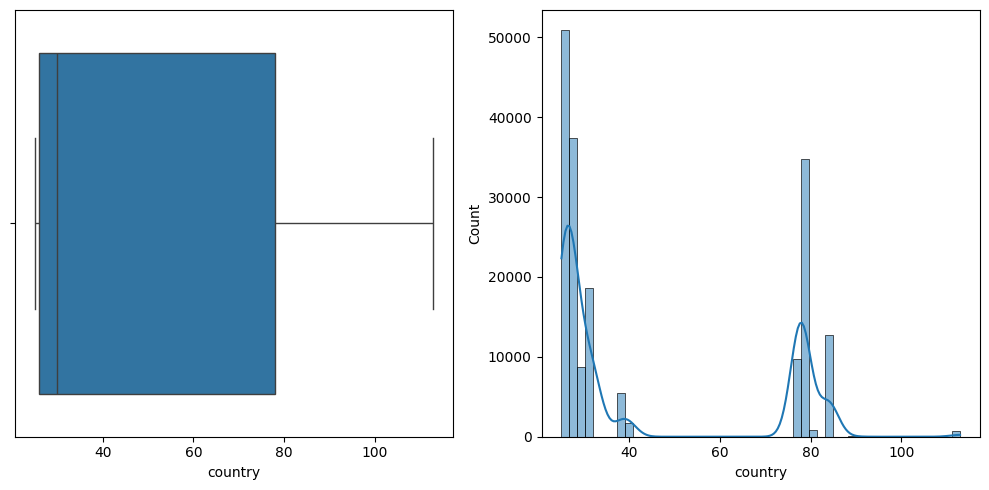

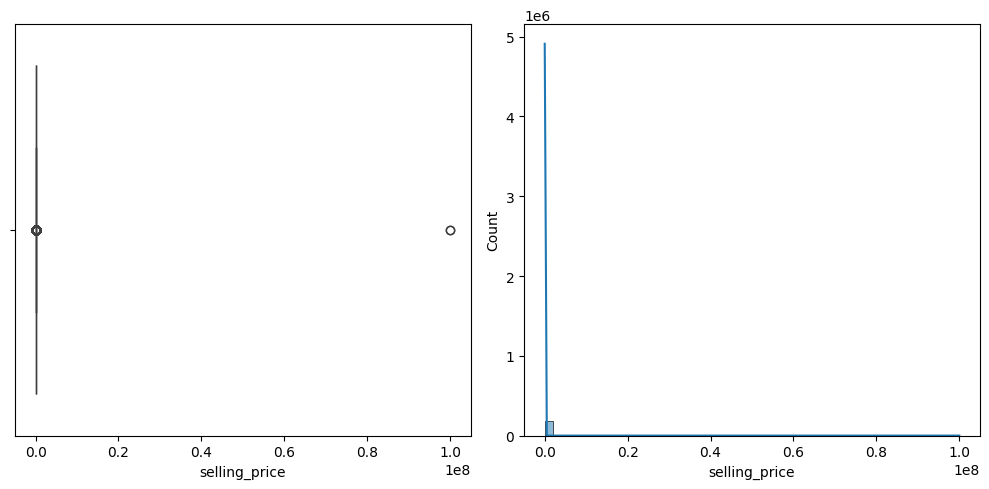

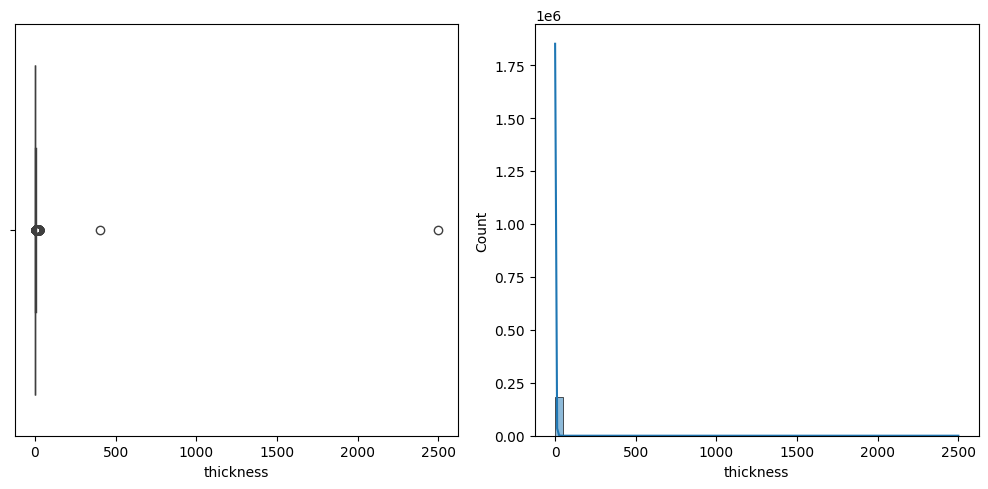

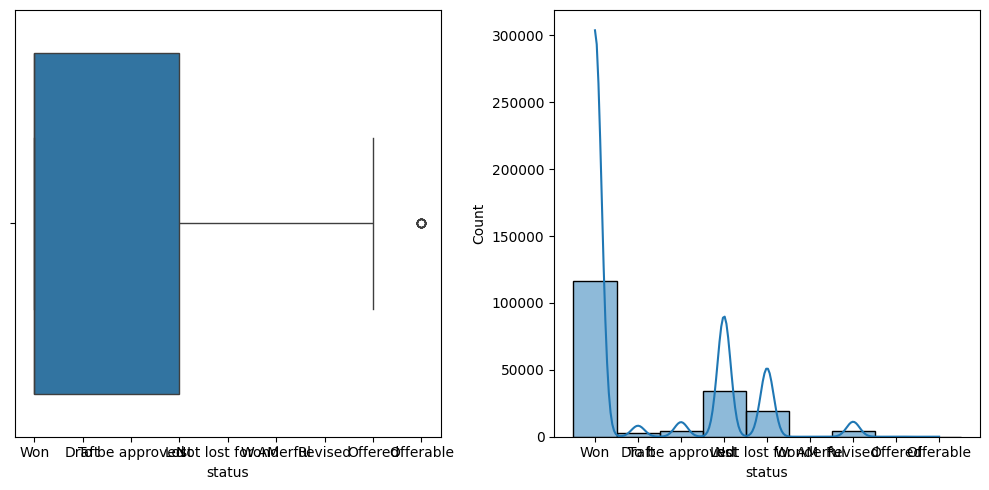

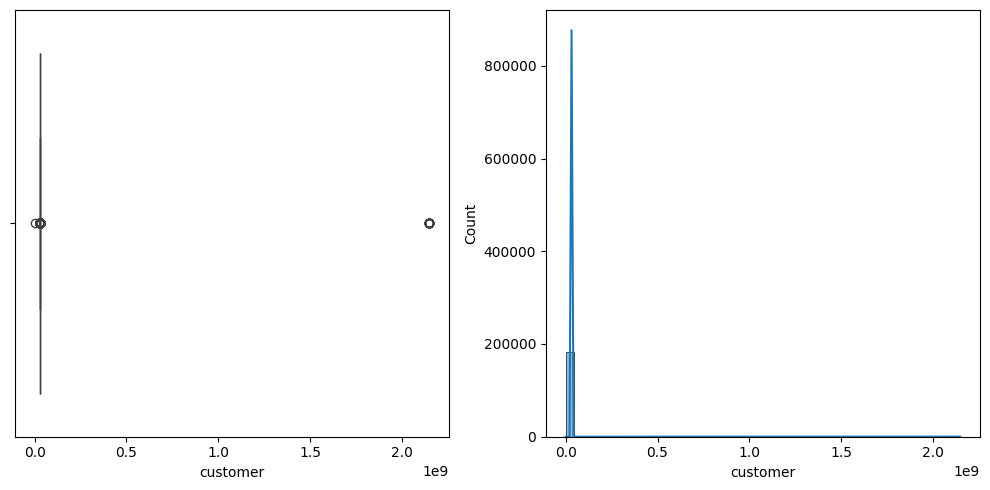

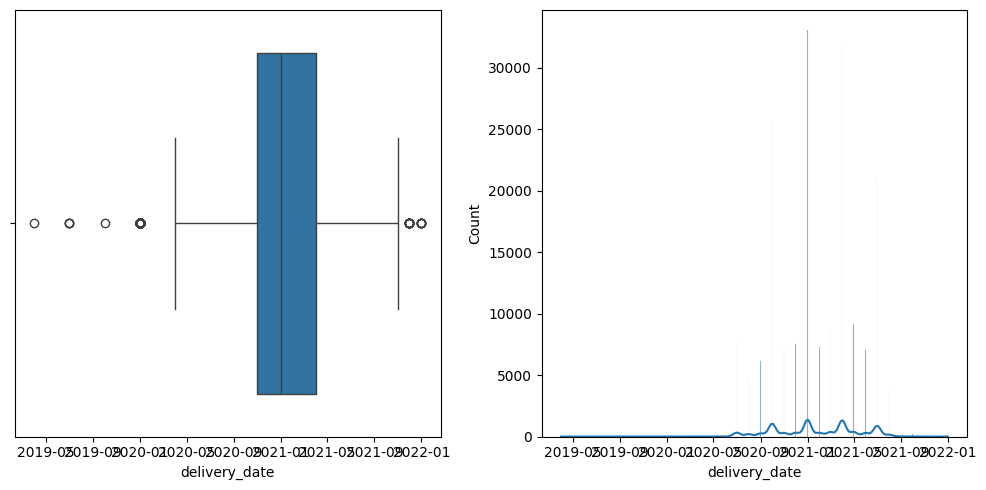

In [69]:
plot_col=['country','selling_price','thickness','status','customer','delivery_date']
for i in plot_col:
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    sns.boxplot(x=df1[i])

    plt.subplot(1,2,2)
    sns.histplot(data=df1, x=i, kde=True,bins=50)

    plt.tight_layout()
    plt.show()

## checking columns that has negative values

In [94]:
num=df1.select_dtypes(include=['number']).columns
for col in num:
    print(f"{col} -  {(df1[col] <= 0).sum()}")

quantity_tons -  4
customer -  0
country -  0
application -  0
thickness -  0
width -  0
product_ref -  0
selling_price -  7


In [95]:
df1.application.value_counts()

application
10.0    77544
41.0    46261
15.0    20772
59.0     8927
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       286
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      102
2.0        34
Name: count, dtype: int64

### Updating negative data points with null so we can impute during nulll treatment

In [96]:
col_to_mask=['quantity_tons', 'selling_price']
df1[col_to_mask] =df1[col_to_mask] .mask(df1[col_to_mask] <= 0, np.nan)

## Imputing null datapoints

In [97]:
df1=df1.drop(['id'],axis=1)
df1.status = df1.status.fillna(df1.status.mode()[0])
df1.customer=df1.customer.fillna(df1.customer.mode()[0])
df1.country=df1.country.fillna(df1.country.mode()[0])
df1.application=df1.application.fillna(df1.application.median())
df1.thickness=df1.thickness.fillna(df1.thickness.median())
df1.item_date = df1.item_date.fillna(df1.item_date.mode()[0])
df1.delivery_date = df1.delivery_date.fillna(df1.delivery_date.mode()[0])
df1.selling_price=df1.selling_price.fillna(df1.selling_price.median())
df1.quantity_tons=df1.quantity_tons.fillna(df1.quantity_tons.median())
df1.material_ref = df1.material_ref.fillna('Unknown')

In [98]:
print(df1.isnull().sum())
print(df1.shape)

item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64
(181673, 13)


## Updating datatypes for efficient usage

In [101]:
type_dict = {
    'item_date': 'datetime64[s]',
    'quantity_tons': 'float32',
    'customer': 'int64',
    'country': 'int8',
    'status': 'category',
    'item_type': 'category',
    'application': 'int8',
    'thickness': 'float32',
    'width': 'int32',
    'product_ref': 'int64',
    'selling_price': 'float64',
    'delivery_date': 'datetime64[s]'
}

df1 = df1.astype(type_dict)

df1.item_date = pd.to_datetime(df1.item_date,format='%Y%m%d', errors='coerce')
df1.delivery_date = pd.to_datetime(df1.delivery_date,format='%Y%m%d', errors='coerce')

## Checking dataframe after null treatment & data type adjustment

In [102]:
print(df1.isnull().sum().sum(),'\n\n',df1.shape,'\n\n')
df1.info()

0 

 (181673, 13) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype        
---  ------         --------------   -----        
 0   item_date      181673 non-null  datetime64[s]
 1   quantity_tons  181673 non-null  float32      
 2   customer       181673 non-null  int64        
 3   country        181673 non-null  int8         
 4   status         181673 non-null  category     
 5   item_type      181673 non-null  category     
 6   application    181673 non-null  int8         
 7   thickness      181673 non-null  float32      
 8   width          181673 non-null  int32        
 9   material_ref   181673 non-null  object       
 10  product_ref    181673 non-null  int64        
 11  delivery_date  181673 non-null  datetime64[s]
 12  selling_price  181673 non-null  float64      
dtypes: category(2), datetime64[s](2), float32(2), float64(1), int32(1), int64(2), int8(2), object(1)
m

In [103]:
df1.describe().T


,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:05,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.0,5874.905762,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.75
customer,181673.0,30512207.073368,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.626356
country,181673.0,44.898125,25.0,26.0,30.0,78.0,113.0,24.405794
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.285898,1.0,1180.0,1250.0,1500.0,2990.0,261.634673
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery_date,181673,2021-01-25 22:43:50,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.0,1918.075544,0.1,669.0,812.0,953.0,100001015.0,331794.729145


In [104]:
df1.dtypes

item_date        datetime64[s]
quantity_tons          float32
customer                 int64
country                   int8
status                category
item_type             category
application               int8
thickness              float32
width                    int32
material_ref            object
product_ref              int64
delivery_date    datetime64[s]
selling_price          float64
dtype: object

## Checking duplicates

In [105]:
print(df1.duplicated().sum())

0


# EDA before handling Outliers and Skewness

## Defining a function to plot datapoint

In [106]:
def plot(df, column):
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()[0]
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
    plt.axvline(mean, color='red', label='Mean')
    plt.axvline(median, color='black', label='Median')
    plt.axvline(mode, color='green', label='Mode')
    plt.legend()

def plot1(df, column):
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()
    sns.histplot(data=df, x=column, kde=True,bins=50)
    plt.title(f'Distribution Plot for {column}')
    plt.axvline(mean,color='red',label='Mean')
    plt.axvline(median,color='black',label='Median')
    plt.axvline(mode[0],color='green',label='Mode')
    plt.legend()

def plot2(df, column):
    stat.probplot(df[column],dist='norm',plot=pylab)
    plt.title(f'Q-Q Plot for {column}')


In [107]:
def plots(df1,width):
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plot(df1,width)

    plt.subplot(1,3,2)
    plot1(df1,width)

    plt.subplot(1,3,3)
    plot2(df1,width)

    plt.tight_layout() 
    plt.show()


## Checking Skewness

## You can understand the presence and direction of skewness by looking at the skew values in the dictionary.

#### General interpretations of a skew value:
1. Positive Skew / Right Skew -  If the skew value is positive (greater than 0), the distribution is skewed to the right. A positive skew value greater than 1 suggests a moderately strong right skew.
2. Negative Skew / Left Skew - If the skew value is negative (less than 0), the distribution is skewed to the left. A negative skew value less than -1 suggests a moderately strong left skew.
3. Values closer to zero indicate a distribution closer to symmetry. A longer tail extending towards higher values.

In [108]:
skew_dict=dict(df1.select_dtypes(include='number').skew())
skew_dict

{'quantity_tons': 424.6908264160156,
 'customer': 86.9853083481409,
 'country': 0.7530895708358325,
 'application': 0.7245643807542177,
 'thickness': 303.44757080078125,
 'width': 0.3744547861560771,
 'product_ref': 1.0152155732872308,
 'selling_price': 301.3880881607121}

In [109]:
#Defining Colors  to print  skewness based on the nature
color_positive = '\033[92m'  # Green for positive skew
color_negative = '\033[91m'  # Red for negative skew
color_neutral = '\033[0m'  # Reset color for near-zero skew

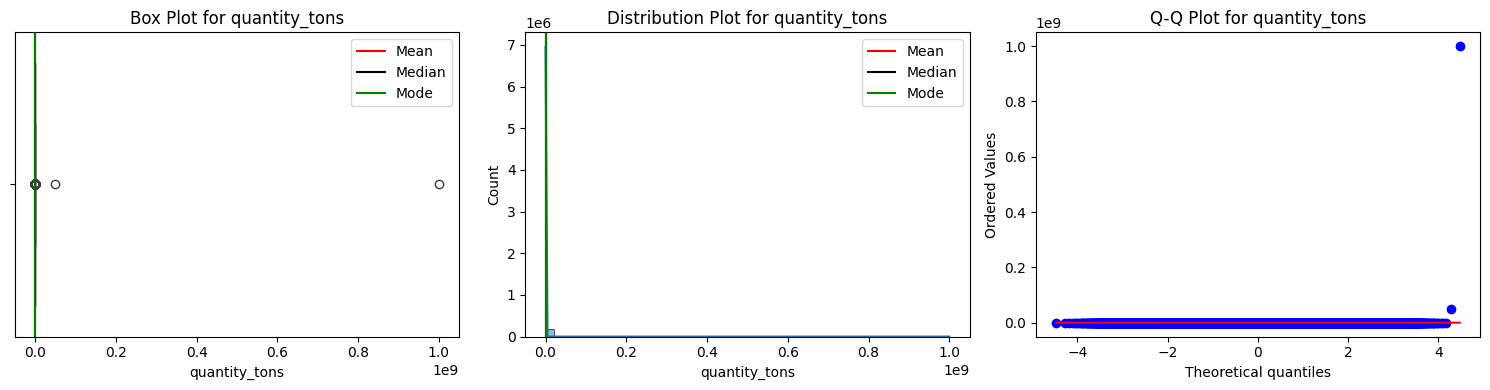

Skew for quantity_tons is 424.69


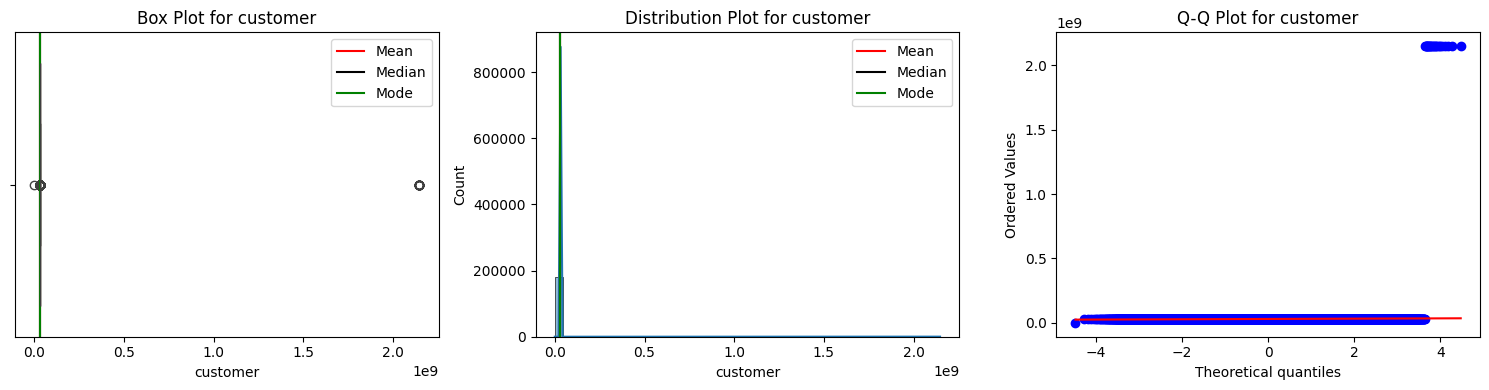

Skew for customer is 86.99


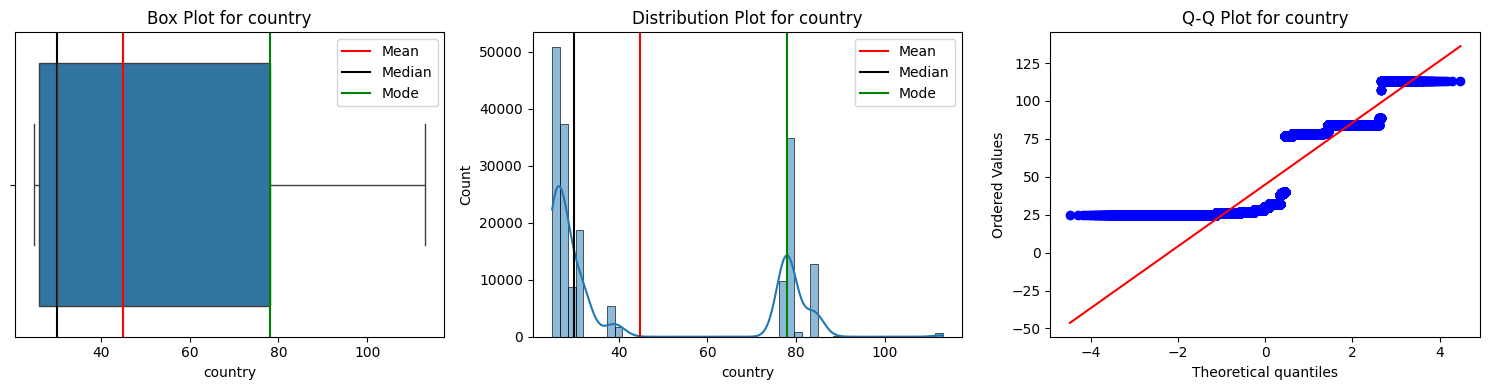

Skew for country is 0.75


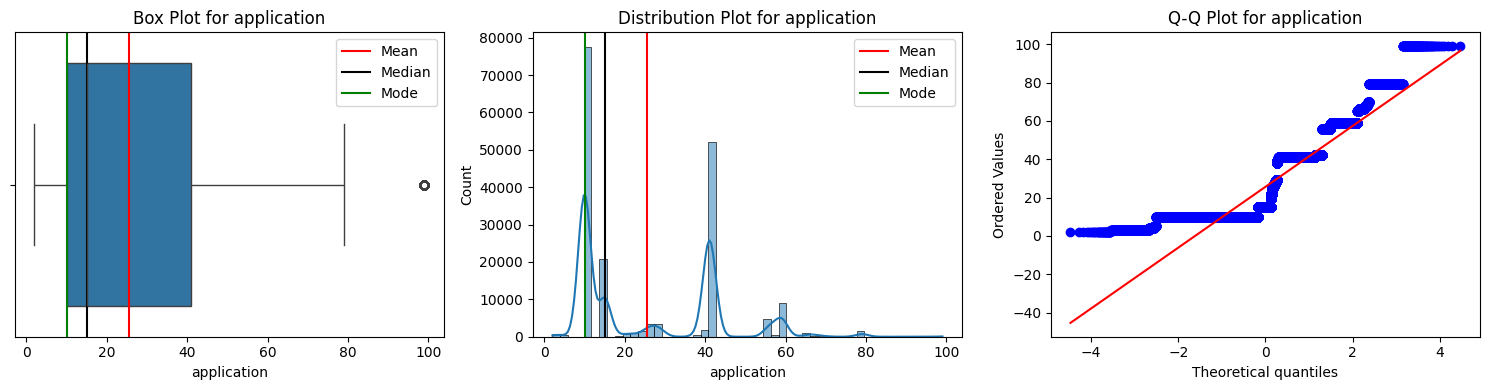

Skew for application is 0.72


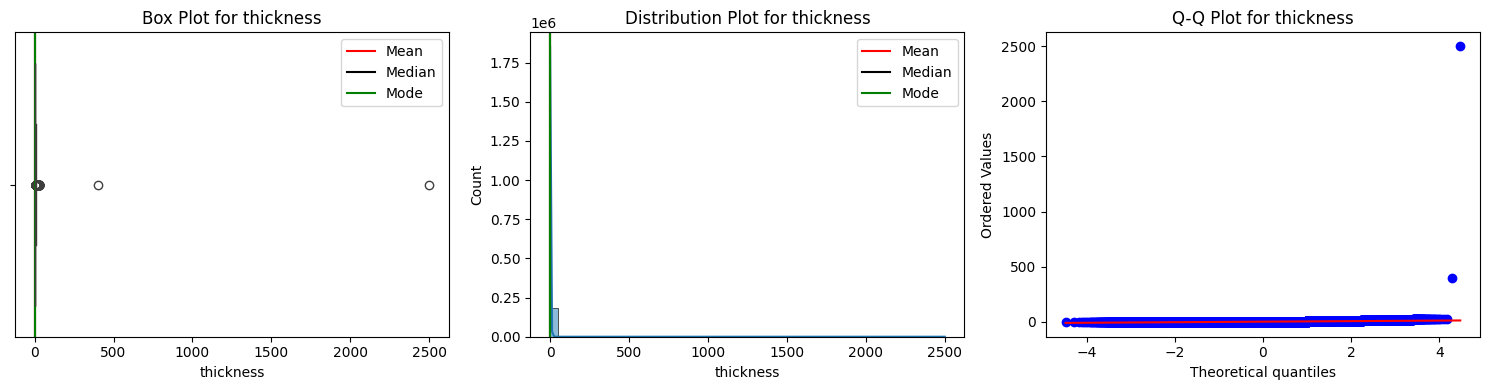

Skew for thickness is 303.45


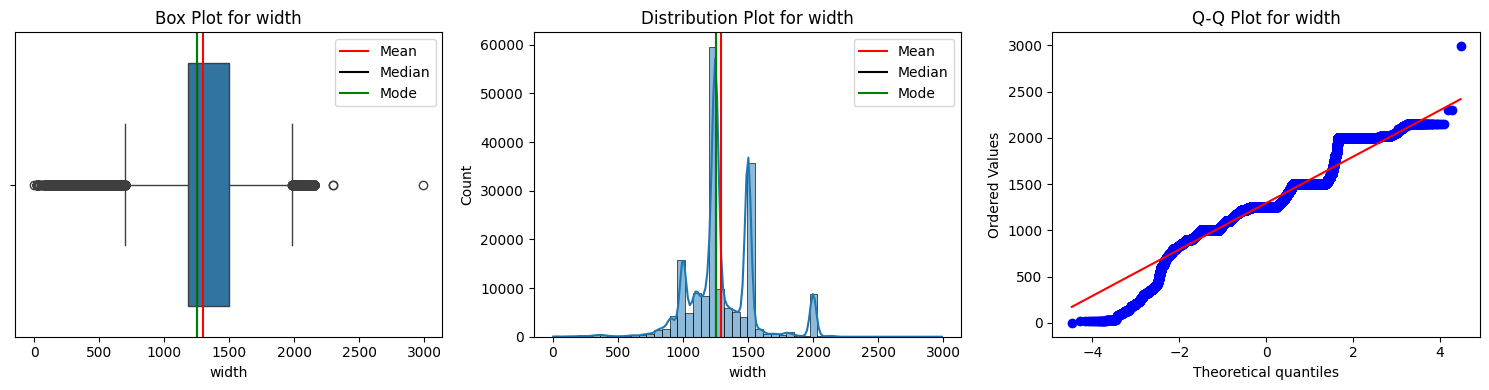

Skew for width is 0.37


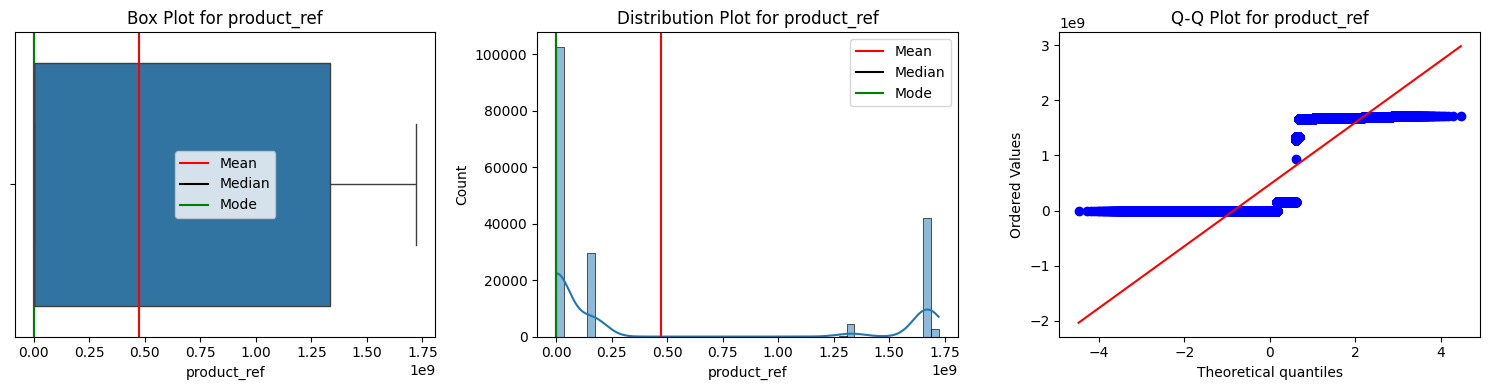

Skew for product_ref is 1.02


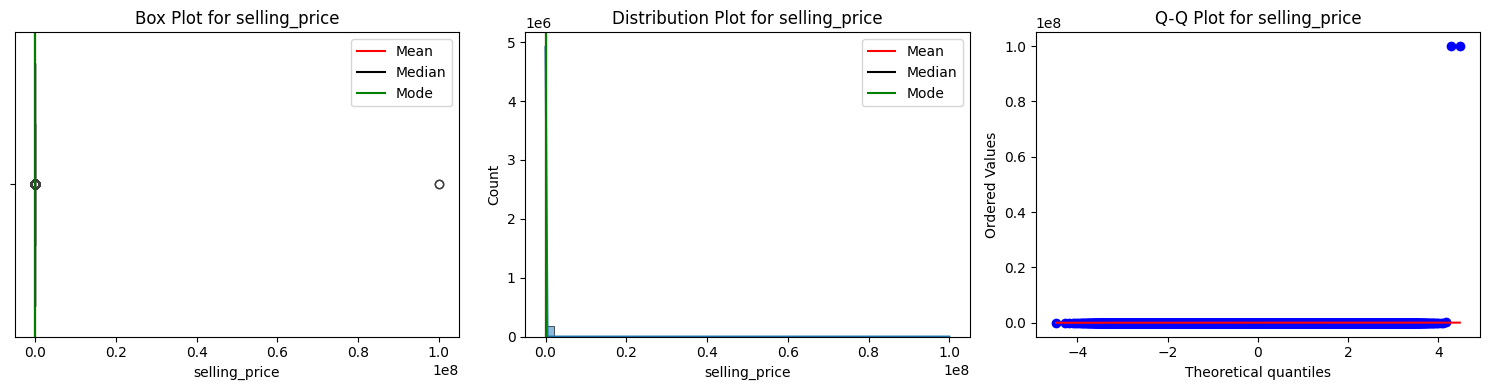

Skew for selling_price is 301.39
Skewed columns - ['quantity_tons', 'customer', 'country', 'application', 'thickness', 'product_ref', 'selling_price']


In [110]:
skewed_col=[]
for i in df1.select_dtypes(include='number'):
    plots(df1,i)
    skew_val = skew_dict[i]
    color = color_neutral
    if skew_val > 0.5:
        color = color_positive
        skewed_col.append(i)
    elif skew_val < -0.5:
        color = color_negative
        skewed_col.append(i)
    print(f"{color}Skew for {i} is {skew_val:.2f}{color_neutral}")    
print(f"Skewed columns - {skewed_col}")

In [112]:
df2=df1.copy()

In [113]:
# df2=df1.copy()
# def zscore_outlier_handling(df,threshold=3,columns=None):
#     columns = df.select_dtypes(include='number').columns.tolist()
#     z_scores=stat.zscore(df[columns])
#     outliers_mask = (np.abs(z_scores) > threshold).any(axis=1)
#     for column in columns:
#         median_value = df[column].median()
#         df.loc[outliers_mask, column] = median_value

#     return df
# zscore_outlier_handling(df2,threshold=3) 

In [115]:
def outlier(df, column,iqr_fact):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (iqr_fact*iqr)
    lower_threshold = df[column].quantile(0.25) - (iqr_fact*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    return df

for i in ['quantity_tons','thickness','width','selling_price','application']:
    outlier(df2,i,1.5)

# Experimenting a few types of data transformation techniques to see which suits best

In [118]:
def boxcox_transform(x):
    # Perform Box-Cox transformation
    transformed_data = boxcox(x)[0]  # boxcox returns a tuple, we extract the first element
    return transformed_data

In [119]:
method_functions =  {
    'log': np.log,
    'square': np.sqrt,
    'rec': lambda x: 1 / x,
    'sig': lambda x: 1 / (1 + np.exp(-x)),
    'pow': lambda x: np.power(x, 2),
    'boxcox': boxcox_transform,
        }

def skewness(df, column, method):
    normalized_df=pd.DataFrame()

    for method_name, func in method_functions.items():
        for col in column:

            new_column = f'{col}_{method_name}'
            transformed_values = func(df[col])
            normalized_df[new_column] = transformed_values

    return normalized_df
columns=['quantity_tons','thickness','selling_price']
normalized_df=skewness(df2, columns, method_functions)

## Plotting transformed data to see visually.

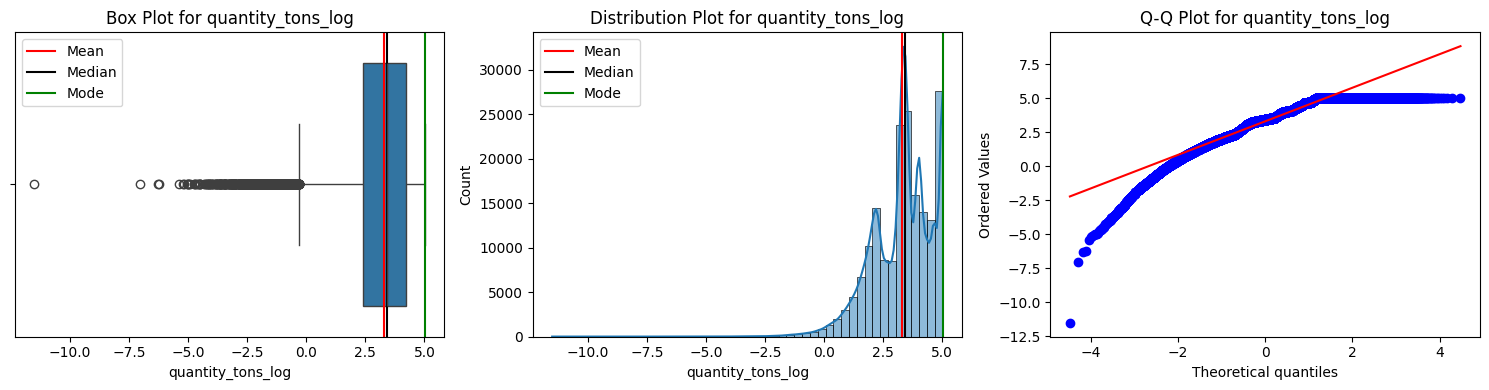

Skenewss of quantity_tons_log = -0.7883778927446471


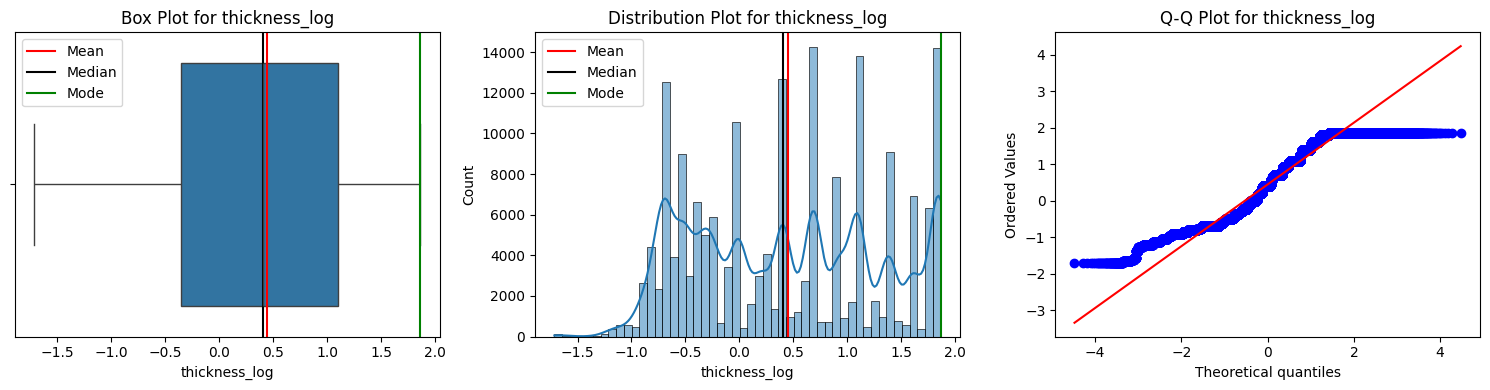

Skenewss of thickness_log = 0.10095131880299194


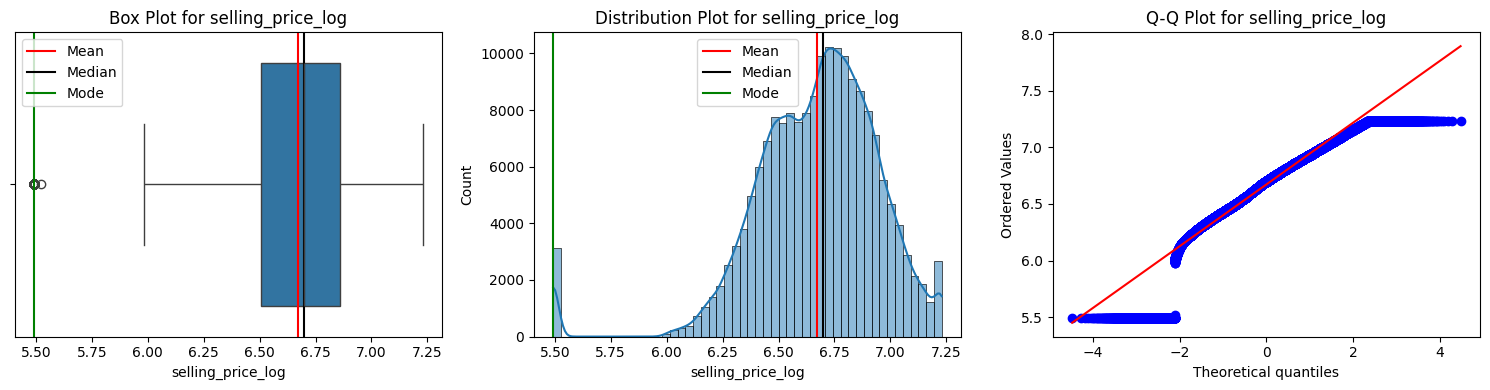

Skenewss of selling_price_log = -1.151883765130167


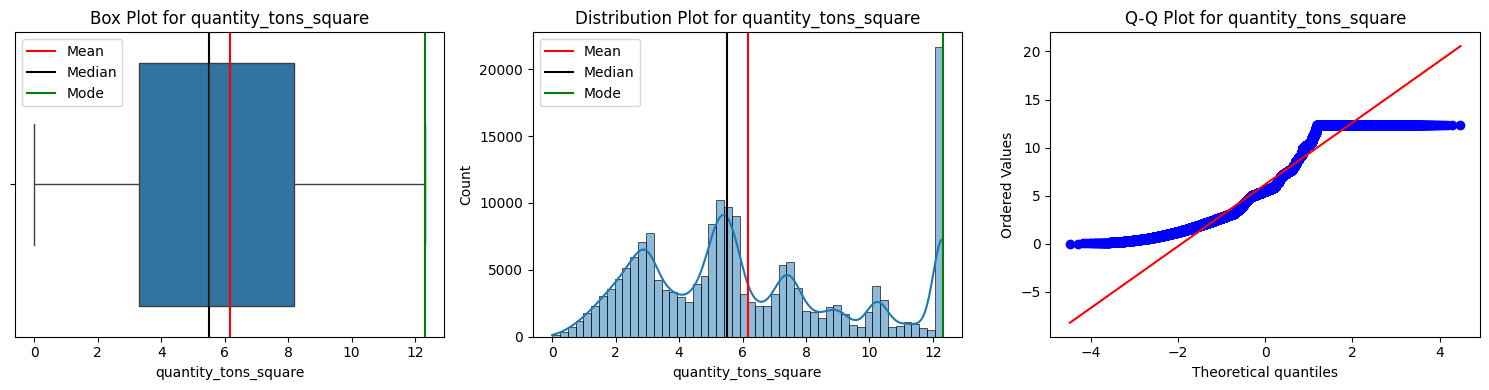

Skenewss of quantity_tons_square = 0.507204960866602


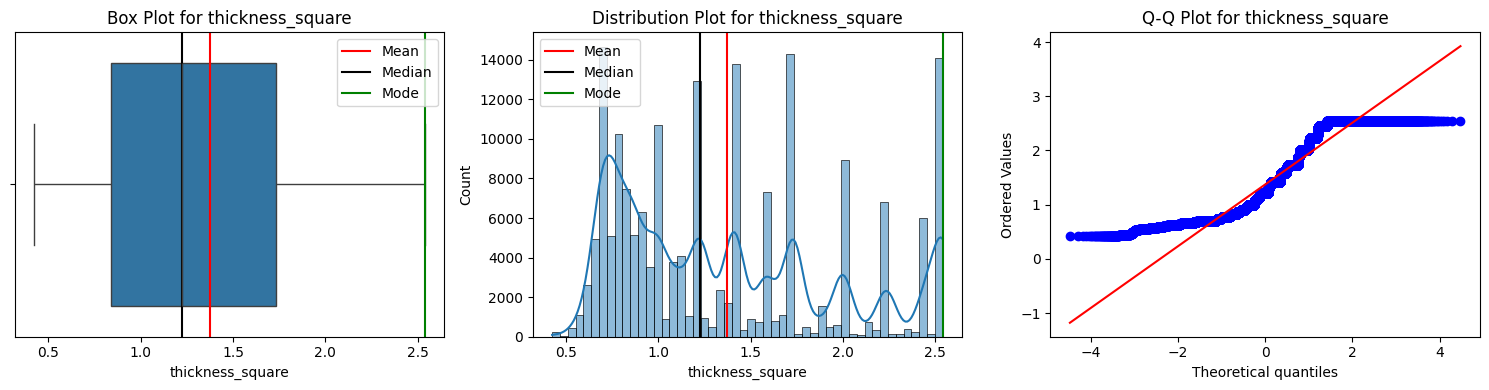

Skenewss of thickness_square = 0.6089243439431077


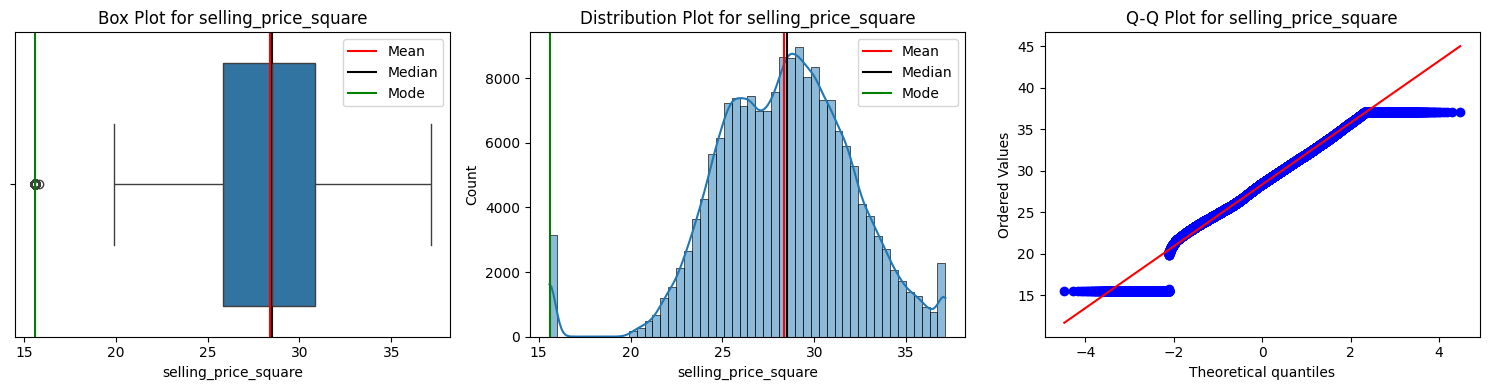

Skenewss of selling_price_square = -0.40454561548392975


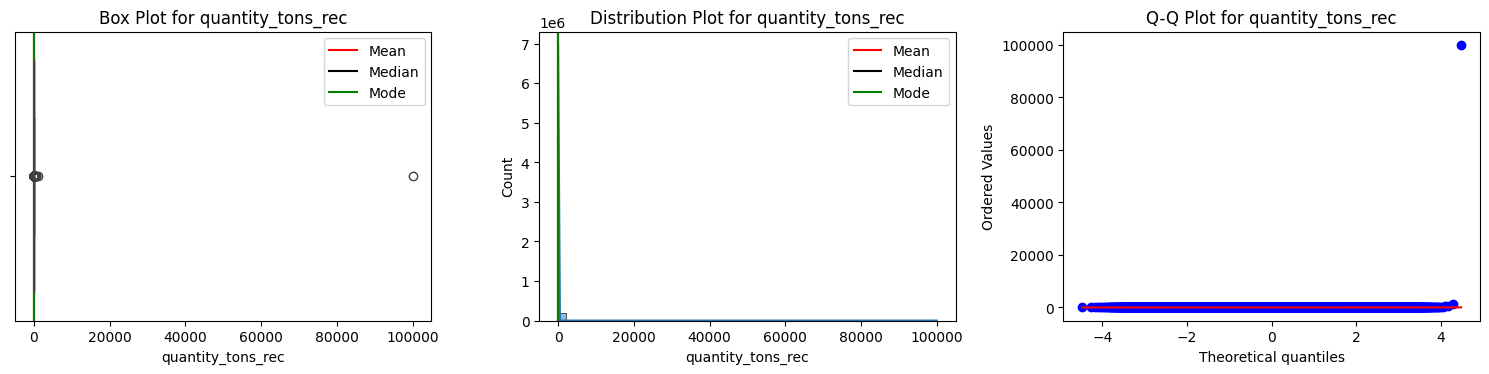

Skenewss of quantity_tons_rec = 426.0858898362051


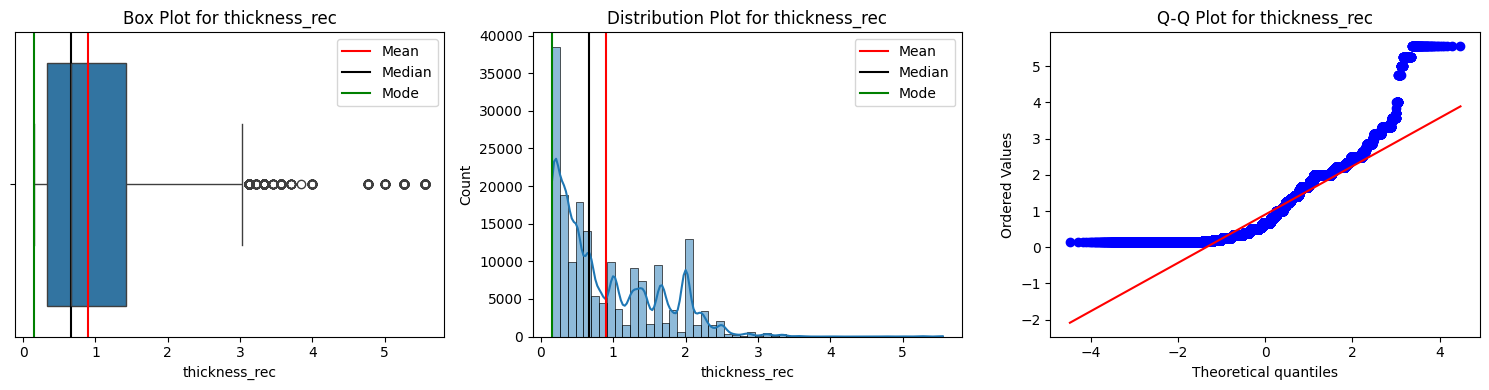

Skenewss of thickness_rec = 1.0596899825243864


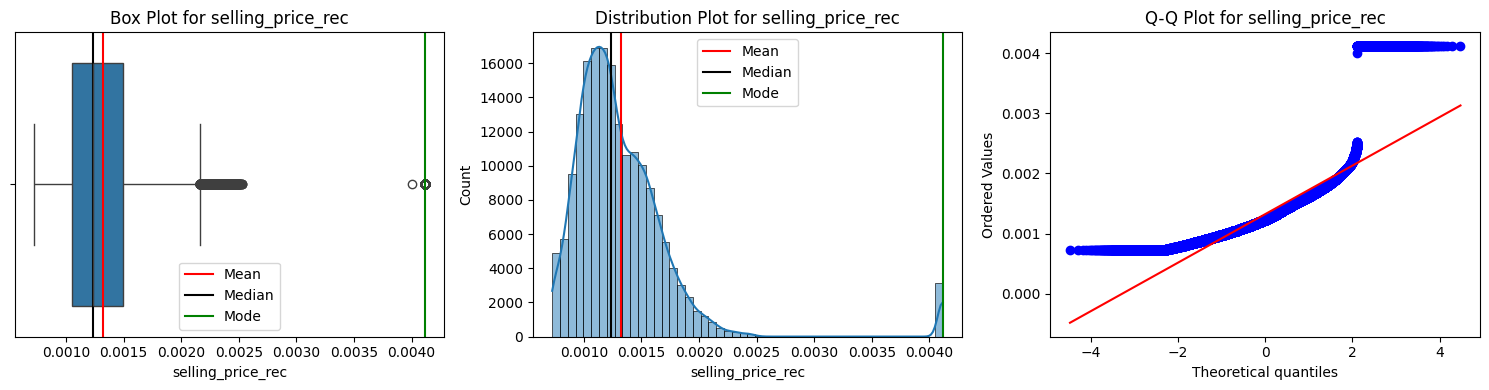

Skenewss of selling_price_rec = 3.43580050848589


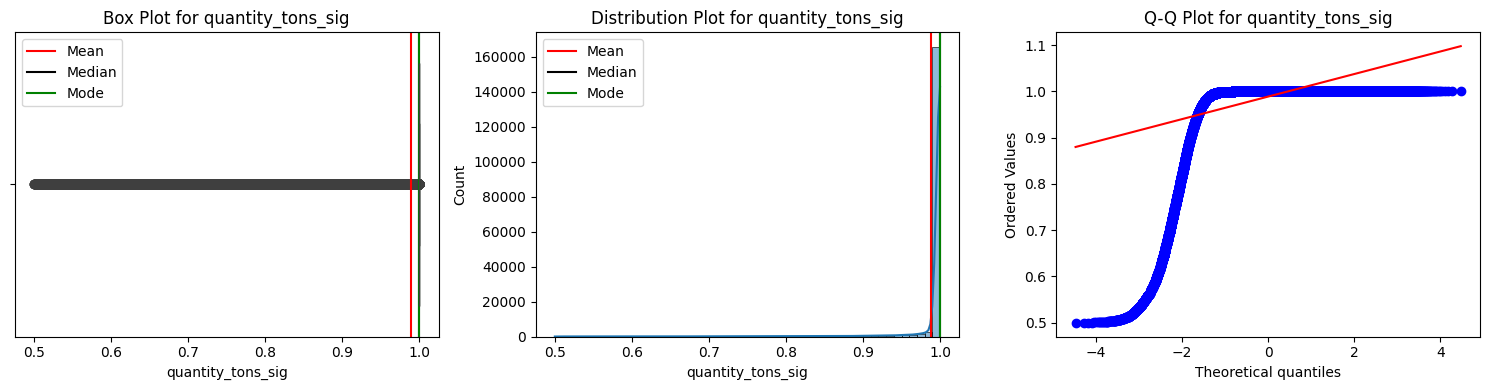

Skenewss of quantity_tons_sig = -6.125422161675817


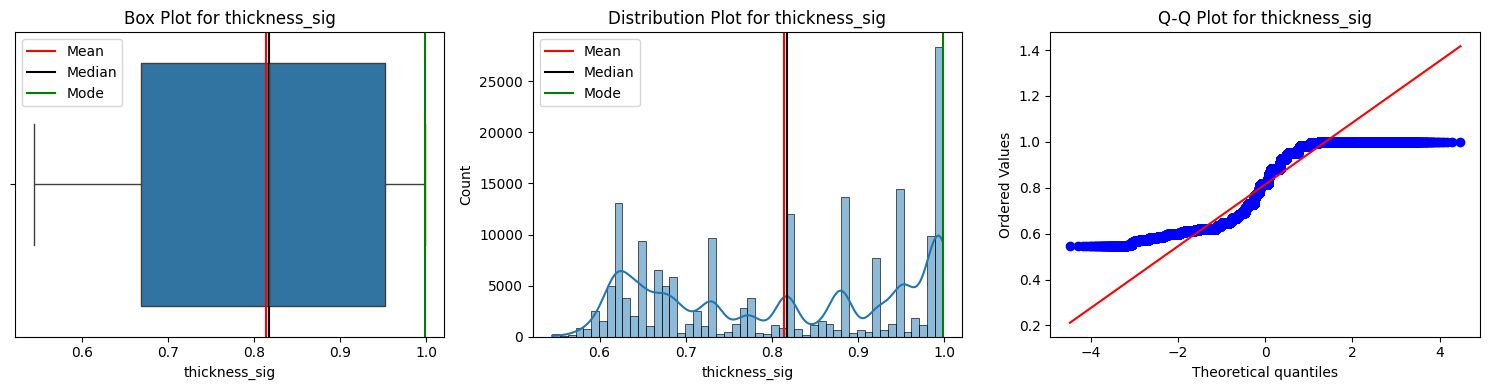

Skenewss of thickness_sig = -0.09223504943311463


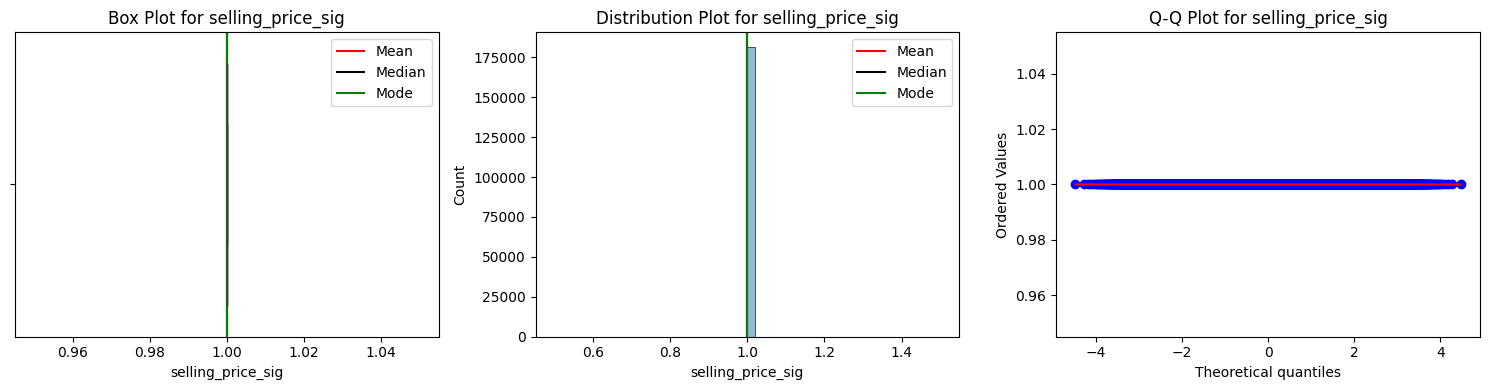

Skenewss of selling_price_sig = 0.0


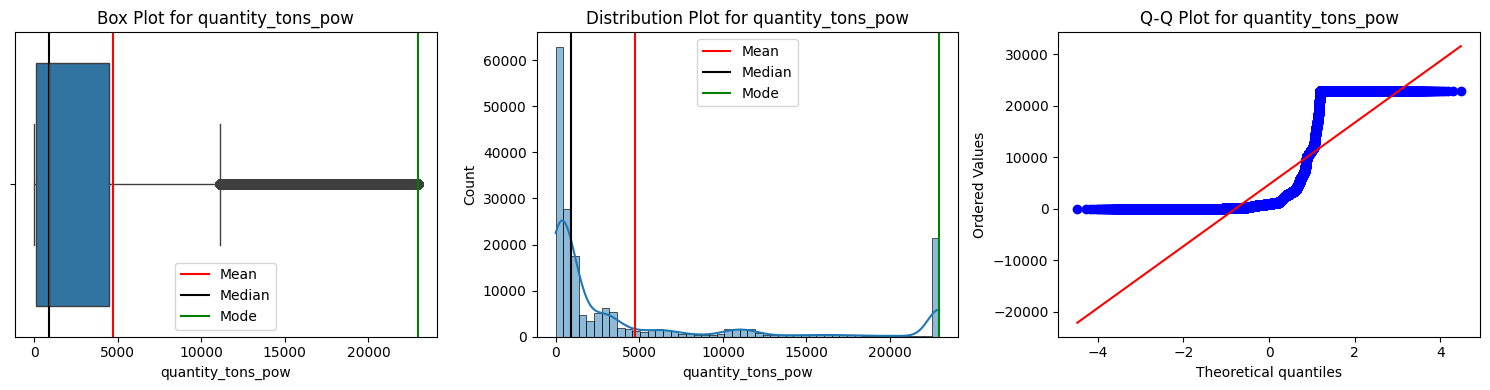

Skenewss of quantity_tons_pow = 1.6855667747015979


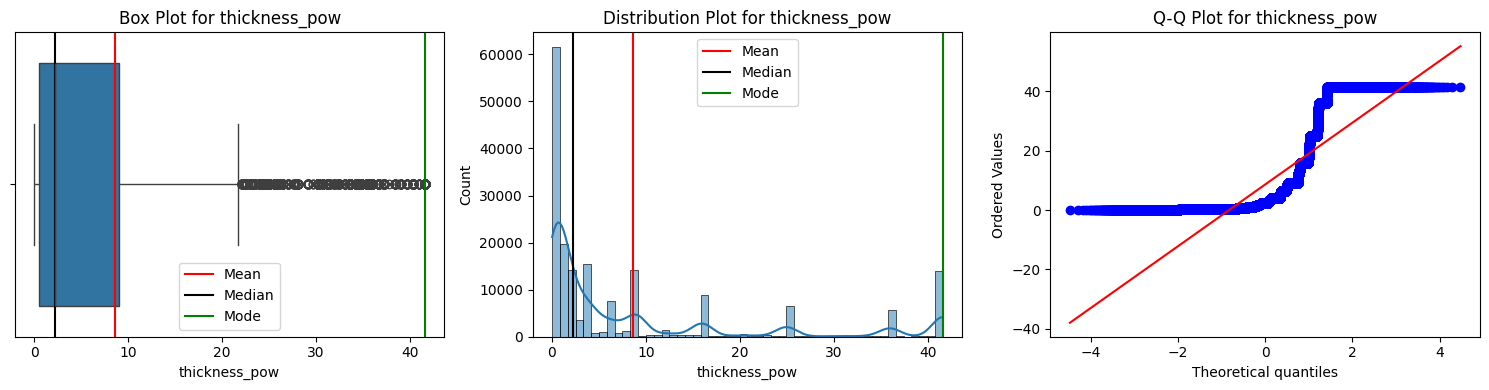

Skenewss of thickness_pow = 1.691183738053465


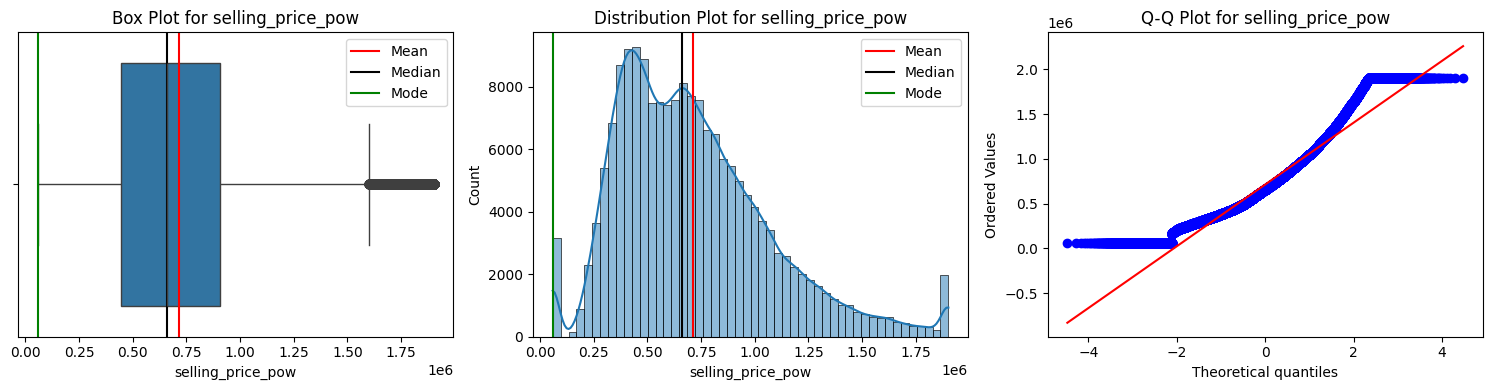

Skenewss of selling_price_pow = 0.9214058785591981


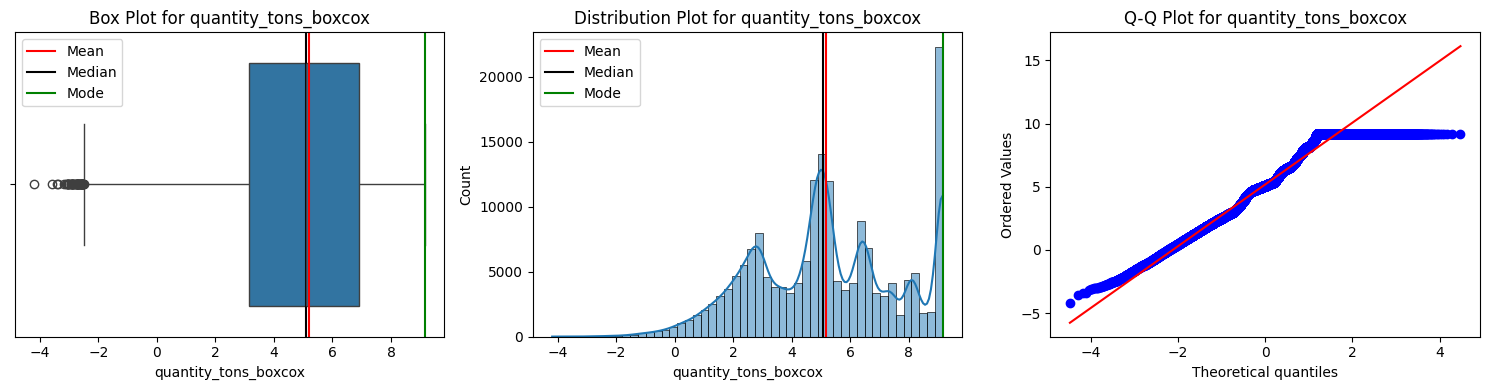

Skenewss of quantity_tons_boxcox = -0.05962082759113481


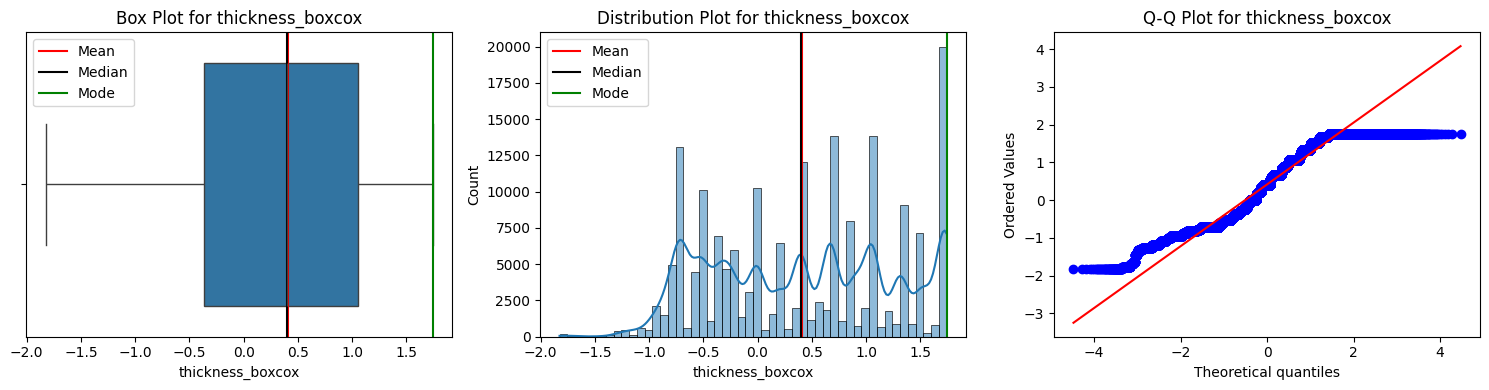

Skenewss of thickness_boxcox = 0.02527892164181112


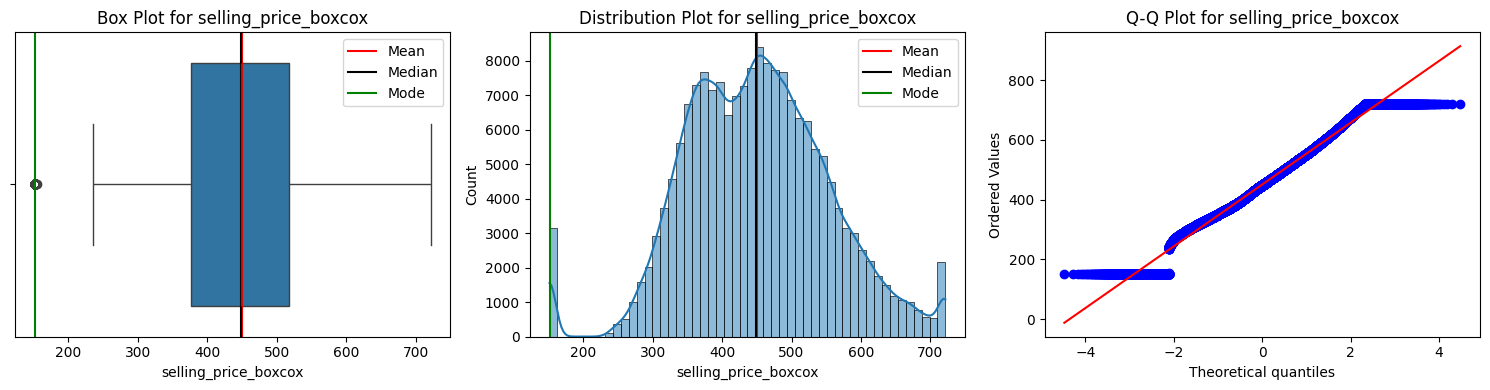

Skenewss of selling_price_boxcox = 0.036101290455574


In [120]:
for i in normalized_df.columns:
    plots(normalized_df,i)
    print(f'Skenewss of {i} = {normalized_df[i].skew()}')

# Data Transformation

From the experiment above,we could see that the  boxcox data transformation method is best.

In [122]:
df2['quantity_tons_boxcox'] = boxcox_transform(df2['quantity_tons'])
df2['thickness_boxcox'] = boxcox_transform(df2['thickness'])
df2['selling_price_boxcox'] = boxcox_transform(df2['selling_price'])
df2.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,quantity_tons_boxcox,thickness_boxcox,selling_price_boxcox
0,2021-04-01,54.151138,30156308,28,Won,W,10.0,2.00,1500,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.388106,0.675994,469.366790
1,2021-04-01,151.443459,30202938,25,Won,W,41.0,0.80,1210,Unknown,1668701718,2021-04-01,1047.00,9.160894,-0.224961,563.518176
2,2021-04-01,151.443459,30153963,30,Won,WI,28.0,0.38,952,S0380700,628377,2021-01-01,644.33,9.160894,-1.002383,364.483015
3,2021-04-01,151.443459,30349574,32,Won,S,59.0,2.30,1317,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,9.160894,0.808224,426.716448
4,2021-04-01,151.443459,30211560,28,Won,W,10.0,4.00,1980,2_S275JR+AR-CL1,640665,2021-03-01,577.00,9.160894,1.318808,330.084748


## Checking transformed data points range so we can apply appropriate data type

In [123]:
print(df2.selling_price_boxcox.min(), '  -  ' , df2.selling_price_boxcox.max())
print(df2.thickness_boxcox.min(), '  -  ' , df2.thickness_boxcox.max())
print(df2.quantity_tons_boxcox.min(), '  -  ' , df2.quantity_tons_boxcox.max())

151.58633015229532   -   721.4207098014228
-1.8261232191474128   -   1.7434352618334155
-4.189770069838515   -   9.160894386723207


In [124]:
df2['selling_price_boxcox'] = df2['selling_price_boxcox'].astype('int32')
df2['thickness_boxcox'] = df2['thickness_boxcox'].astype('int8')
df2['quantity_tons_boxcox'] = df2['quantity_tons_boxcox'].astype('int8')

# EDA After handling Outliers and Skewness

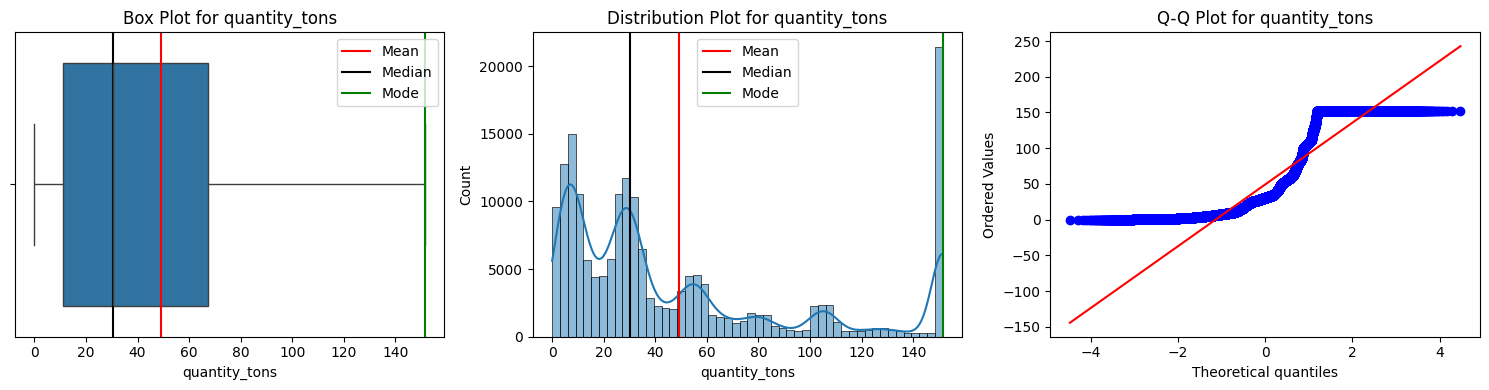

Skew for quantity_tons is 1.12


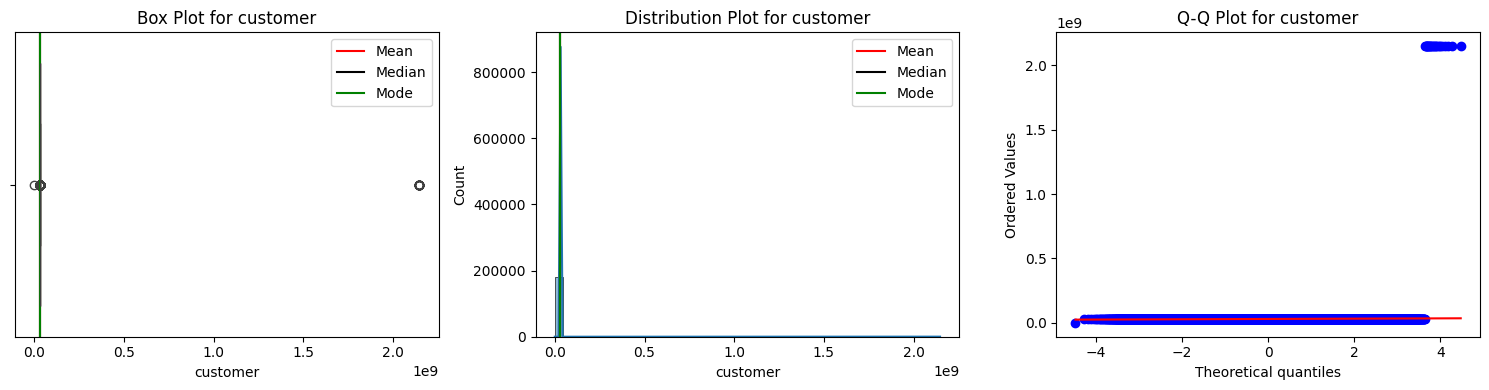

Skew for customer is 86.99


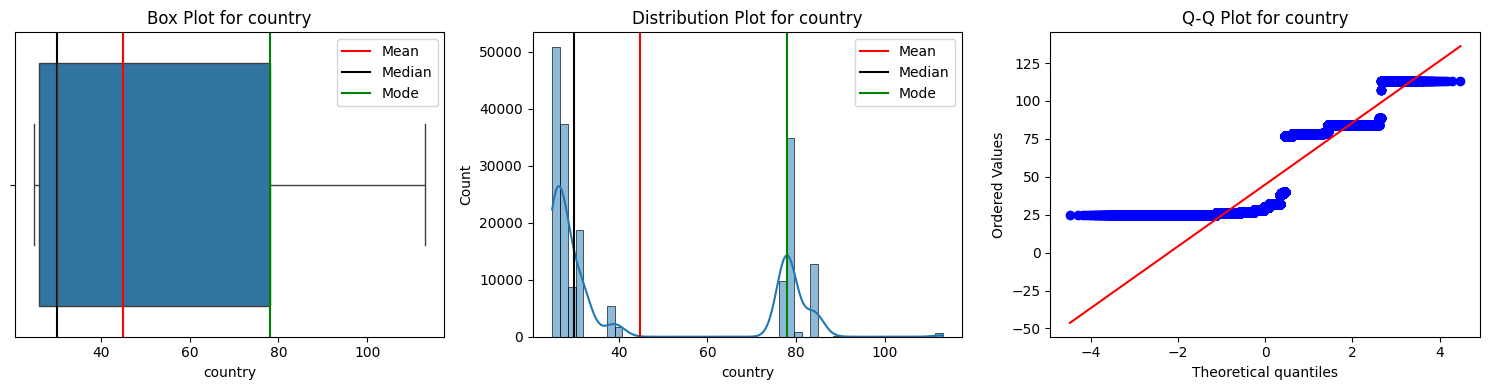

Skew for country is 0.75


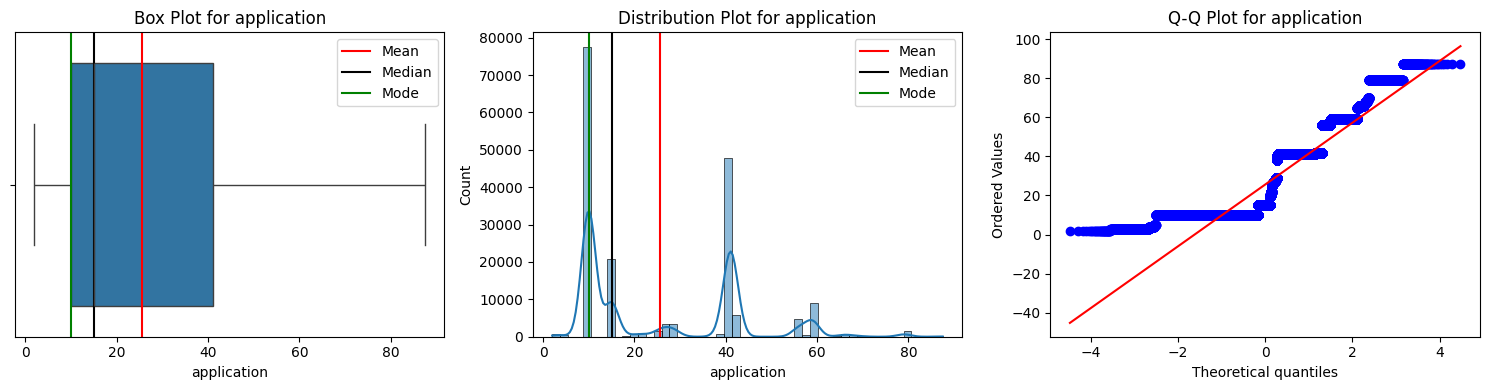

Skew for application is 0.71


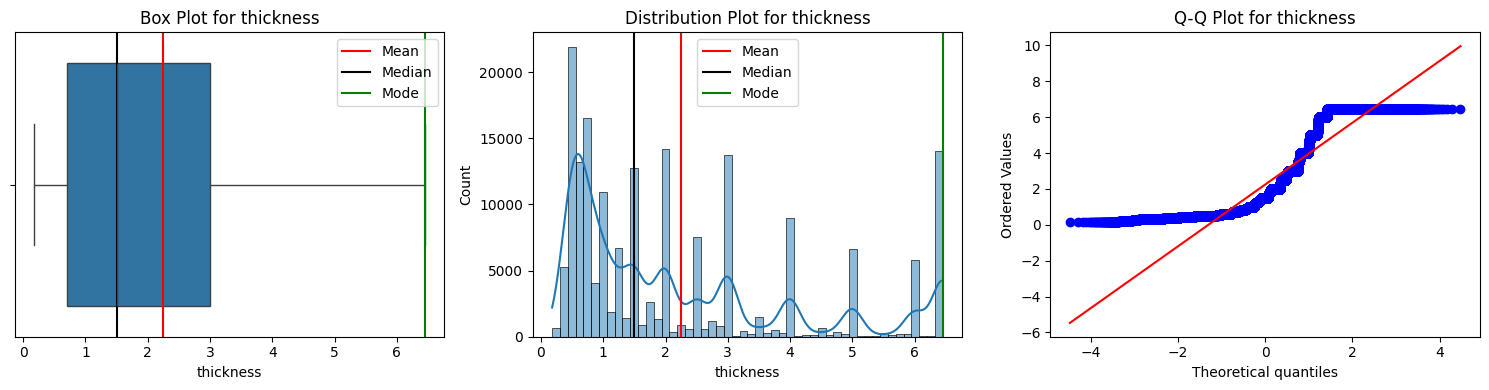

Skew for thickness is 1.06


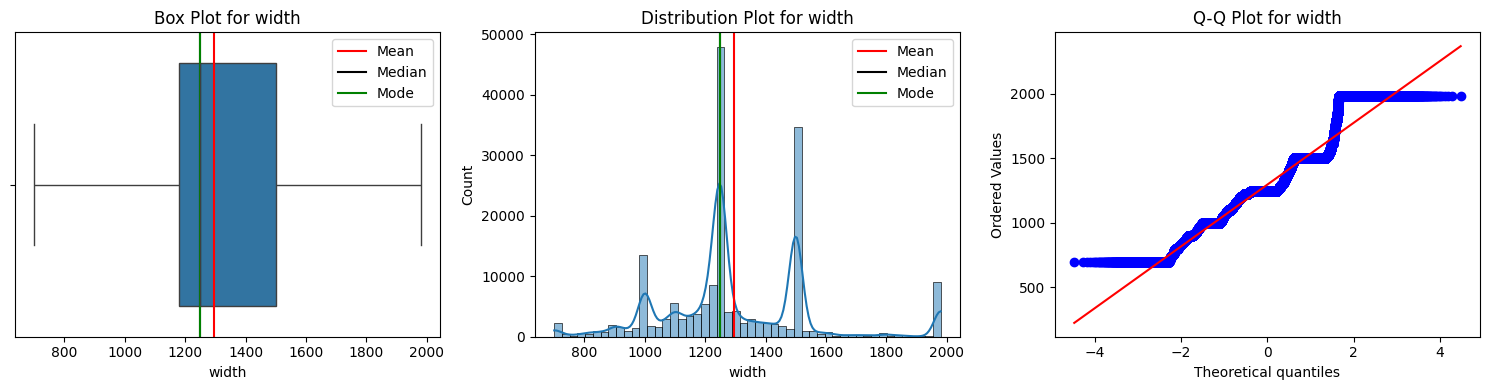

Skew for width is 0.67


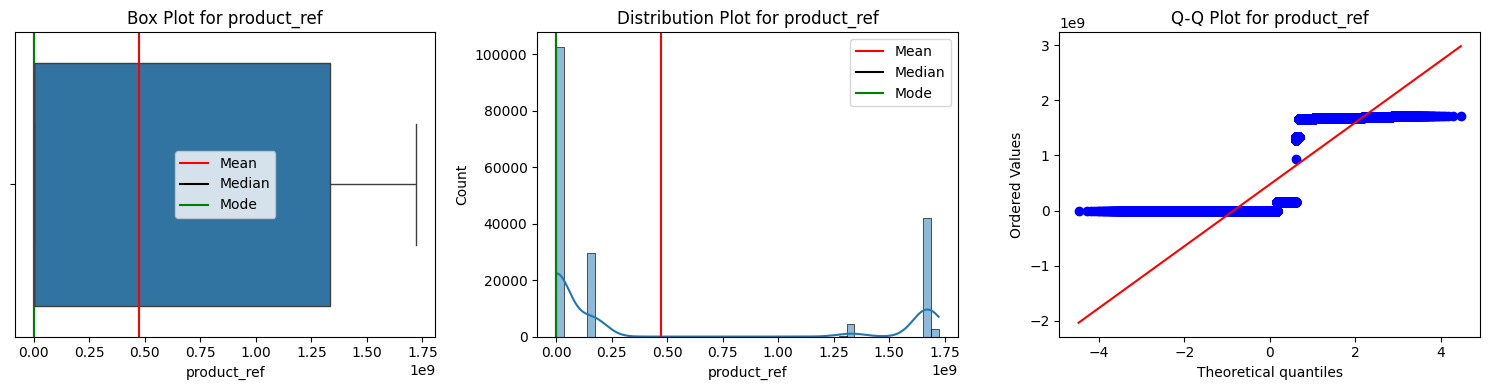

Skew for product_ref is 1.02


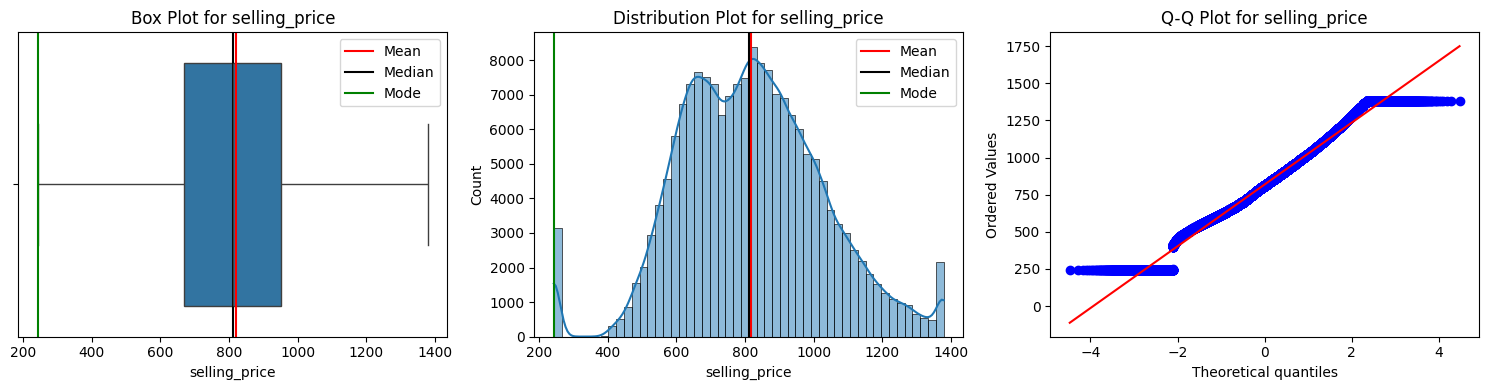

Skew for selling_price is 0.14


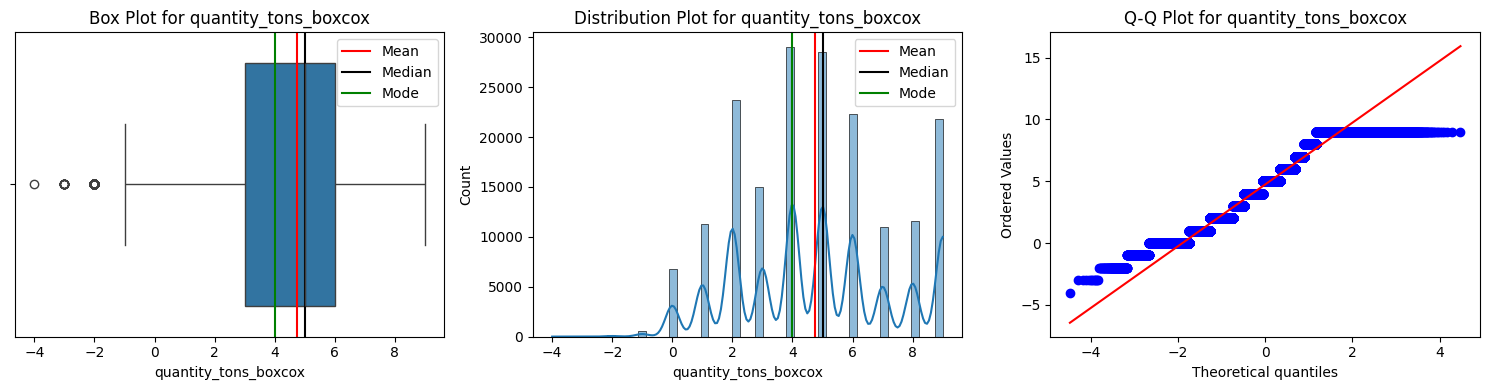

Skew for quantity_tons_boxcox is 0.07


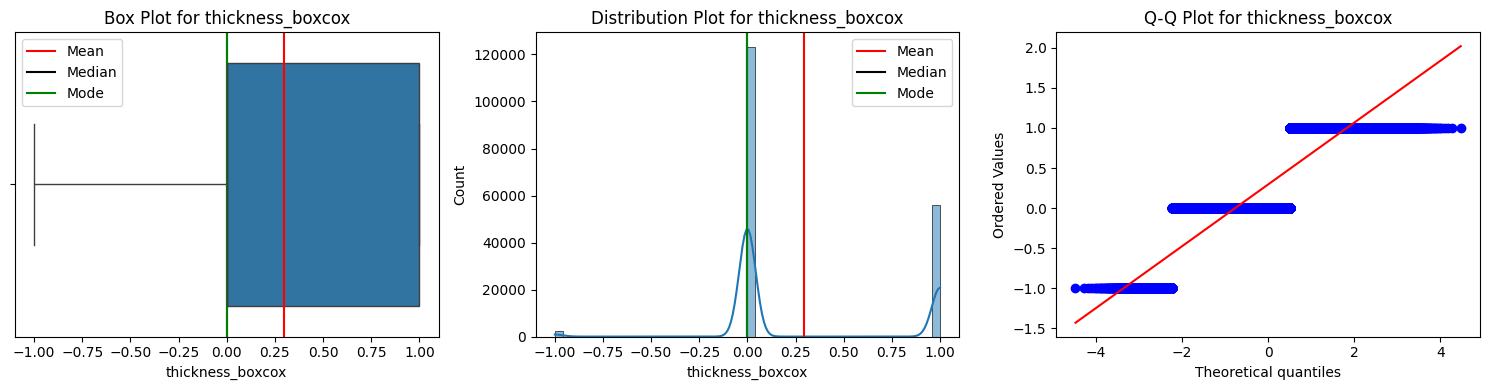

Skew for thickness_boxcox is 0.55


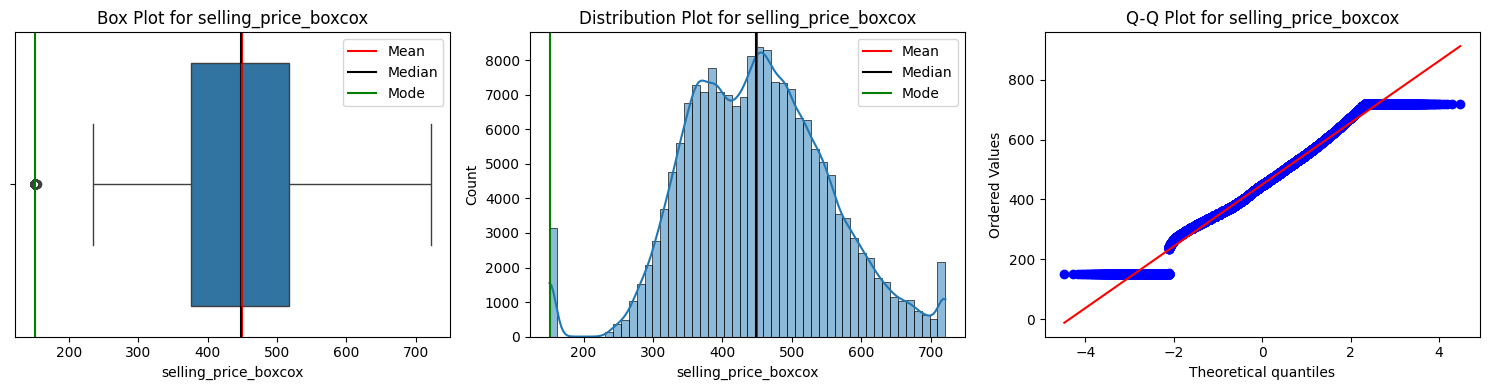

Skew for selling_price_boxcox is 0.04
Skewed columns - ['quantity_tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'thickness_boxcox']


In [125]:
color_positive = '\033[92m'  # Green for positive skew
color_negative = '\033[91m'  # Red for negative skew
color_neutral = '\033[0m'  # Reset color for near-zero skew
skewed_col=[]
for i in  df2.select_dtypes(include='number'):
    plots(df2,i)
    skew_val = df2[i].skew()
    color = color_neutral
    if skew_val > 0.5:
        color = color_positive
        skewed_col.append(i)
    elif skew_val < -0.5:
        color = color_negative
        skewed_col.append(i)
    print(f"{color}Skew for {i} is {skew_val:.2f}{color_neutral}")    
print(f"Skewed columns - {skewed_col}")

In [126]:
df2.select_dtypes(include='number').var()

quantity_tons           2.303227e+03
customer                5.921313e+14
country                 5.956428e+02
application             3.139337e+02
thickness               3.574775e+00
width                   6.198203e+04
product_ref             5.148207e+17
selling_price           4.373390e+04
quantity_tons_boxcox    6.534079e+00
thickness_boxcox        2.341815e-01
selling_price_boxcox    1.079956e+04
dtype: float64

# Feature Engineering & Encoding

In [144]:
df3=df2.copy()

In [148]:
df3['delivery_time_taken'] = (df3.delivery_date-df3.item_date).abs().dt.days

df3['volume'] = np.multiply(df3['quantity_tons'], df3['thickness'], df3['width'])
df3['unit_price'] = (df3['selling_price']/(df3['quantity_tons'] * df3['thickness']))

df3['delivery_day'] = df3['delivery_date'].dt.day
df3['delivery_month'] = df3['delivery_date'].dt.month
df3['delivery_year'] = df3['delivery_date'].dt.year

df3['item_day'] = df3['item_date'].dt.day
df3['item_month'] = df3['item_date'].dt.month
df3['item_year'] = df3['item_date'].dt.year

C:\Users\sansu\AppData\Local\Temp\ipykernel_18460\3912831270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['volume'] = np.multiply(df3['quantity_tons'], df3['thickness'], df3['width'])


In [149]:
print(df3.status.unique())
print(df3.status.value_counts())

['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful']
status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64


In [150]:
print(df3.item_type.unique())
print(df3.item_type.value_counts())

['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
Categories (7, object): ['IPL', 'Others', 'PL', 'S', 'SLAWR', 'W', 'WI']
item_type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64


# Dropping uneccesary Datapoints & Columns

In [151]:
df4 = df3[(df3['status'] == 'Won') | (df3['status'] == 'Lost')]

In [152]:
df4['transformed_status'] = df4['status'].map({'Won':1,'Lost':0,})

encoder = LabelEncoder()
df4['transformed_item'] = encoder.fit_transform(df4['item_type'])

df4['transformed_status'] = df4['transformed_status'] .astype('int8')
df4['transformed_item'] = df4['transformed_item'] .astype('int8')

C:\Users\sansu\AppData\Local\Temp\ipykernel_18460\4242477312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['transformed_status'] = df4['status'].map({'Won':1,'Lost':0,})
C:\Users\sansu\AppData\Local\Temp\ipykernel_18460\4242477312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['transformed_item'] = encoder.fit_transform(df4['item_type'])
C:\Users\sansu\AppData\Local\Temp\ipykernel_18460\4242477312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [153]:
print(df4.item_type.unique(),"\n",df4.transformed_item.unique())
print(df4.item_type.value_counts(),"\n",df4.transformed_item.value_counts())

['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
Categories (7, object): ['IPL', 'Others', 'PL', 'S', 'SLAWR', 'W', 'WI'] 
 [5 6 3 1 2 0 4]
item_type
W         91956
S         52467
PL         5032
WI          504
Others      463
IPL          27
SLAWR         1
Name: count, dtype: int64 
 transformed_item
5    91956
3    52467
2     5032
6      504
1      463
0       27
4        1
Name: count, dtype: int64


In [154]:
print(df4.status.unique() , "\n" ,df4.transformed_status.unique())
print(df4.status.value_counts(),"\n", df4.transformed_status.value_counts()) 

['Won', 'Lost']
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful'] 
 [1 0]
status
Won                116012
Lost                34438
Draft                   0
Not lost for AM         0
Offerable               0
Offered                 0
Revised                 0
To be approved          0
Wonderful               0
Name: count, dtype: int64 
 transformed_status
1    116012
0     34438
Name: count, dtype: int64


In [156]:
col_to_drop=['quantity_tons','status','item_type','item_date','material_ref','delivery_date','selling_price','thickness','country']
df4=df4.drop(columns =col_to_drop)

# Checking Data Frame

In [157]:
df4.head()

,customer,application,width,product_ref,quantity_tons_boxcox,thickness_boxcox,selling_price_boxcox,delivery_time_taken,volume,unit_price,delivery_day,delivery_month,delivery_year,item_day,item_month,item_year,transformed_status,transformed_item
0,30156308,10.000000,108.302277,1670798778,6,0,469,91,108.302277,7.885337,1,7,2021,1,4,2021,1,5
1,30202938,41.000000,121.154769,1668701718,9,0,563,0,121.154769,8.641839,1,4,2021,1,4,2021,1,5
2,30153963,28.000000,57.548514,628377,9,-1,364,90,57.548514,11.196293,1,1,2021,1,4,2021,1,6
3,30349574,59.000000,348.319949,1668701718,9,0,426,90,348.319949,2.204869,1,1,2021,1,4,2021,1,3
4,30211560,10.000000,605.773836,640665,9,1,330,31,605.773836,0.952501,1,3,2021,1,4,2021,1,5


In [158]:
df4.tail()

,customer,application,width,product_ref,quantity_tons_boxcox,thickness_boxcox,selling_price_boxcox,delivery_time_taken,volume,unit_price,delivery_day,delivery_month,delivery_year,item_day,item_month,item_year,transformed_status,transformed_item
181668,30200854,41.000000,98.383123,164141591,8,0,337,1,98.383123,6.007128,1,7,2020,2,7,2020,1,5
181669,30200854,41.000000,143.871284,164141591,9,0,336,1,143.871284,4.093937,1,7,2020,2,7,2020,1,5
181670,30200854,41.000000,3.007272,164141591,1,0,351,1,3.007272,205.834425,1,7,2020,2,7,2020,1,5
181671,30200854,41.000000,25.810262,164141591,5,0,342,1,25.810262,23.285312,1,7,2020,2,7,2020,1,5
181672,30200854,41.000000,107.524853,164141591,9,0,345,1,107.524853,5.645207,1,7,2020,2,7,2020,1,5


In [159]:
print(df4.shape,'\n\n', df4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 150450 entries, 0 to 181672
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer              150450 non-null  int64  
 1   application           150450 non-null  float64
 2   width                 150450 non-null  float64
 3   product_ref           150450 non-null  int64  
 4   quantity_tons_boxcox  150450 non-null  int8   
 5   thickness_boxcox      150450 non-null  int8   
 6   selling_price_boxcox  150450 non-null  int32  
 7   delivery_time_taken   150450 non-null  int64  
 8   volume                150450 non-null  float64
 9   unit_price            150450 non-null  float64
 10  delivery_day          150450 non-null  int32  
 11  delivery_month        150450 non-null  int32  
 12  delivery_year         150450 non-null  int32  
 13  item_day              150450 non-null  int32  
 14  item_month            150450 non-null  int32  
 15  item_

In [161]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,150450.000000,30275102.297228,9454989.156623,12458.000000,30196886.000000,30205312.000000,30279818.000000,2147483647.000000
application,150450.000000,25.186142,17.607079,2.000000,10.000000,15.000000,41.000000,87.500000
width,150450.000000,110.680258,162.648369,0.000008,15.292937,47.798692,136.480785,976.810313
product_ref,150450.000000,474833694.737122,717260347.192957,611728.000000,628377.000000,640665.000000,1332077137.000000,1722207579.000000
quantity_tons_boxcox,150450.000000,4.700086,2.549083,-4.000000,3.000000,5.000000,6.000000,9.000000
thickness_boxcox,150450.000000,0.305630,0.485761,-1.000000,0.000000,0.000000,1.000000,1.000000
selling_price_boxcox,150450.000000,452.852270,96.151142,151.000000,378.000000,448.000000,516.000000,721.000000
delivery_time_taken,150450.000000,61.938584,40.897241,0.000000,28.000000,57.000000,94.000000,689.000000
volume,150450.000000,110.680258,162.648369,0.000008,15.292937,47.798692,136.480785,976.810313
unit_price,150450.000000,573.388828,176611.543159,0.421781,5.400325,16.879339,57.081487,68500000.709726


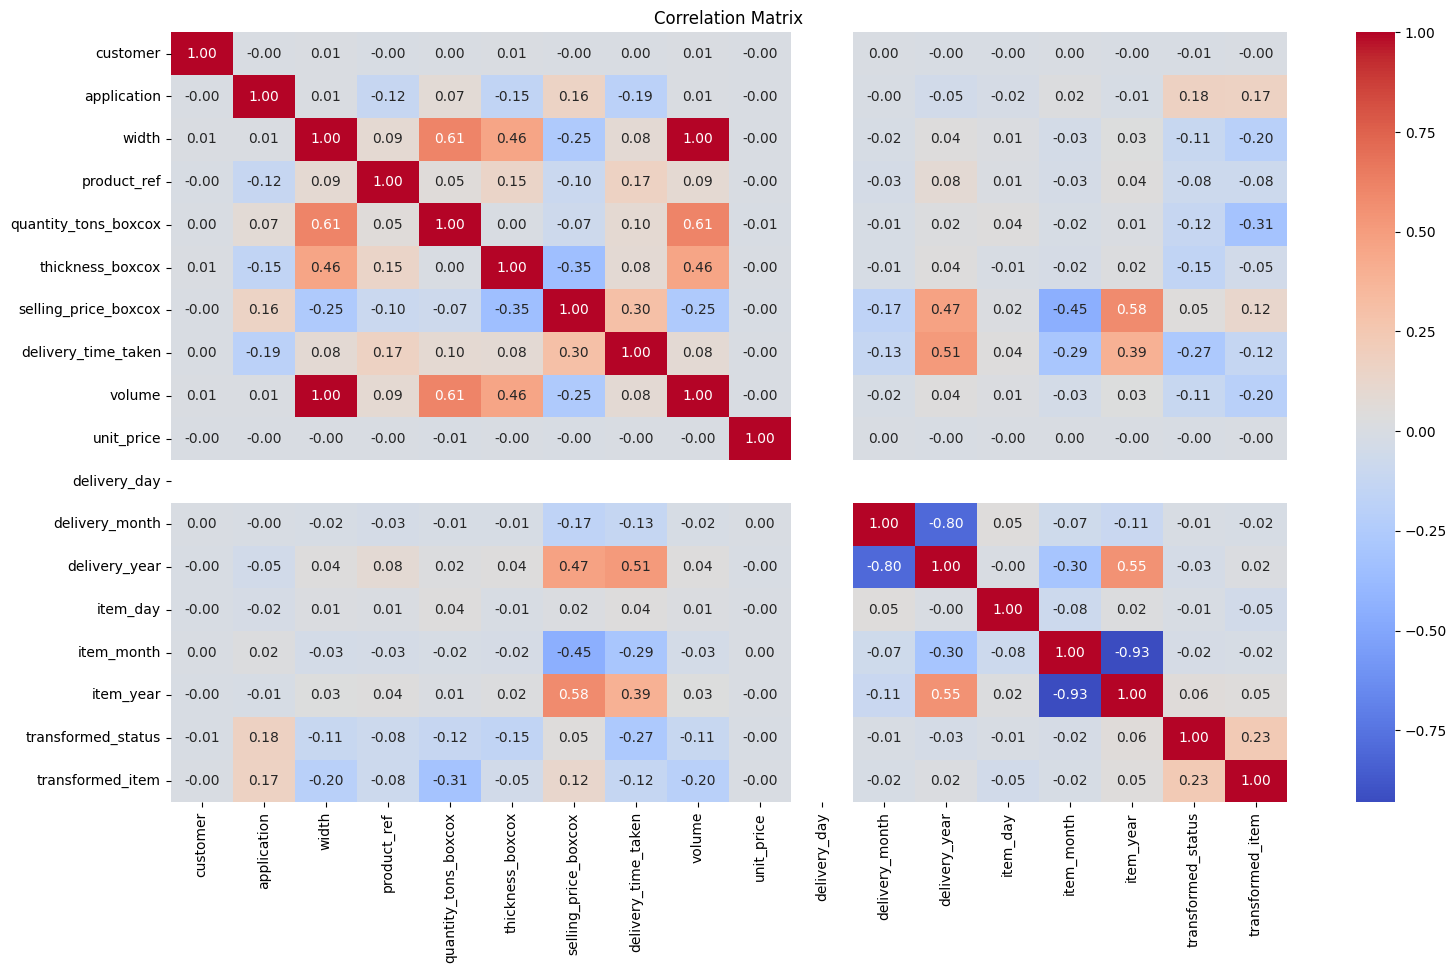

# Classification Method  Prediction  (Won/Lose) model building

## Immporting Necessary libraries

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
import pickle


In [165]:
print(df4.transformed_status.unique())
df4.transformed_status.value_counts()

[1 0]


transformed_status
1    116012
0     34438
Name: count, dtype: int64

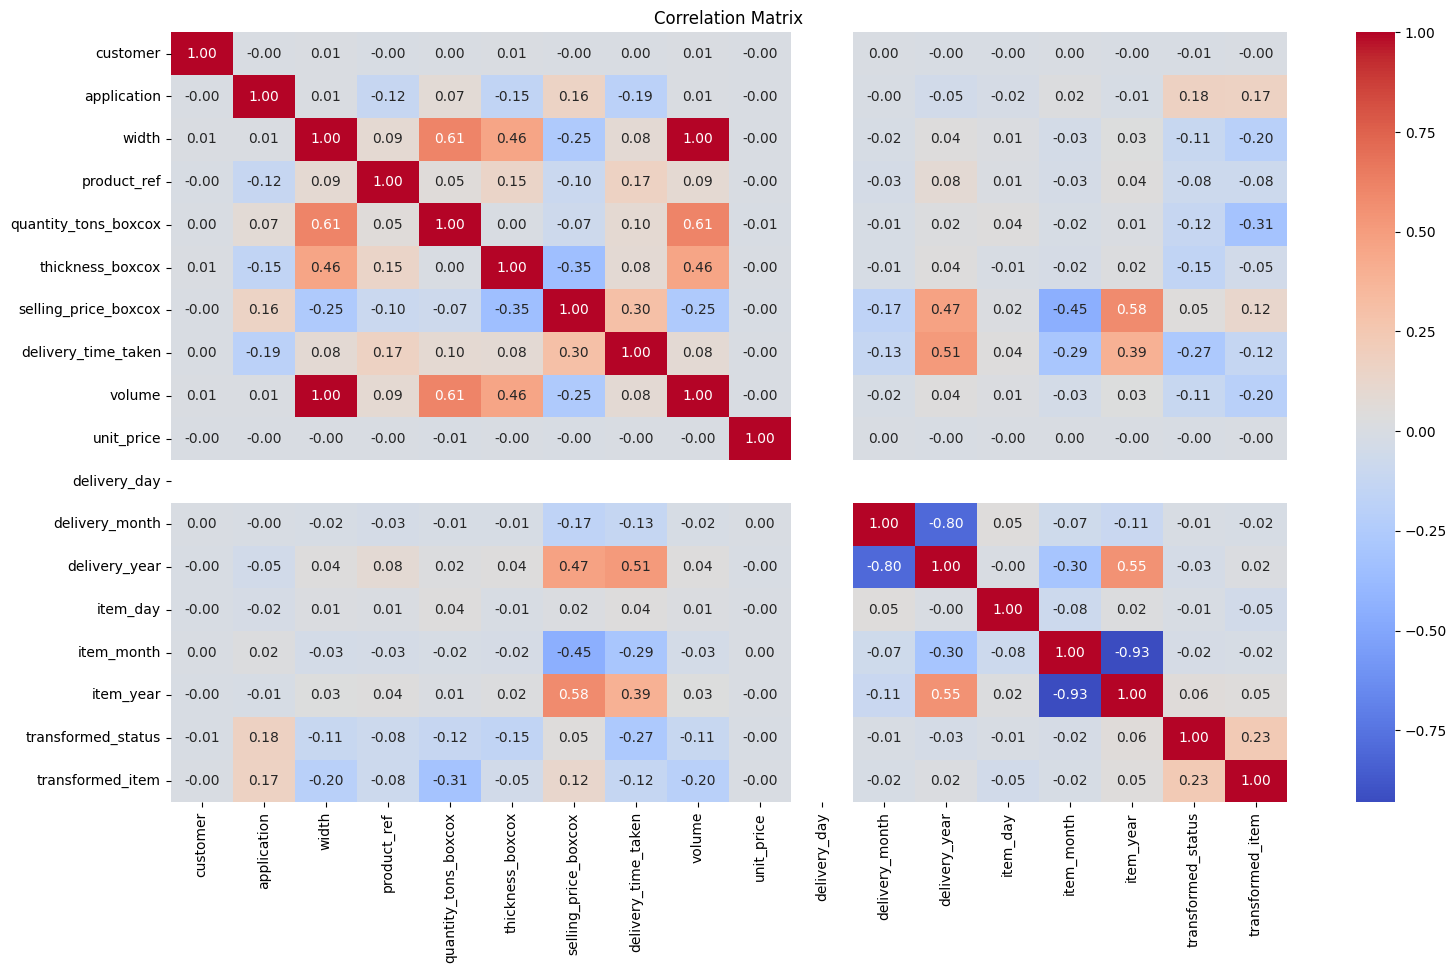

In [167]:
cor_col = df4.select_dtypes(include='number')
correlation_matrix = cor_col.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [168]:
target_corr = df4.corr()['transformed_status'].abs().sort_values(ascending=False)[1:]
target_corr

delivery_time_taken    0.267134
transformed_item       0.234331
application            0.177837
thickness_boxcox       0.152611
quantity_tons_boxcox   0.119962
volume                 0.111372
width                  0.111372
product_ref            0.081066
item_year              0.055570
selling_price_boxcox   0.049632
delivery_year          0.030012
item_month             0.023996
customer               0.008721
item_day               0.008458
delivery_month         0.008436
unit_price             0.004464
delivery_day                NaN
Name: transformed_status, dtype: float64

In [5]:
# df4.tp_csv('data.csv')
df4=pd.read_csv('df4.csv')

In [8]:
x= df4.drop('transformed_status', axis=1)

y=df4[['transformed_status']].values.ravel()

x, y= SMOTETomek().fit_resample(x,y)

In [10]:
print(x.shape)

(230768, 18)


In [11]:
print(y.shape)

(230768,)


In [12]:
scale_class = StandardScaler().fit(x)
x=scale_class.transform(x)
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size=0.2 ,  random_state=42)

In [14]:
import os
pkl_path='pkls/scale_class.pkl'
os.makedirs(os.path.dirname(pkl_path), exist_ok=True)
with open (pkl_path,'wb' ) as file:
    pickle.dump(scale_class,file)
print(f'Pickle file created: {pkl_path}')


df4.to_csv('df4.csv')

Pickle file created: pkls/scale_class.pkl


In [15]:
modeler=[]
modeler.append(('DT_model',DecisionTreeClassifier()))
modeler.append(('RF_model',RandomForestClassifier()))
modeler.append(('ET_model', ExtraTreesClassifier()))
modeler.append(('AB_model',AdaBoostClassifier(algorithm='SAMME')))
modeler.append(('GB_model',GradientBoostingClassifier()))
modeler.append(('LR_model',LogisticRegression()))
modeler.append(('XGB_model',XGBClassifier()))


In [16]:
from colorama import Fore, Style

color_positive = Fore.GREEN
reset_color = Style.RESET_ALL

In [17]:
for name, model in modeler:
    print(f"{color_positive}{name} - - {model}")
    print()
    model.fit(x_train,y_train)
    y_preds=model.predict(x_test)
    y_preds_train=model.predict(x_train)
    print(f"{color_positive}Confusion Matrix {reset_color} -- {confusion_matrix(y_test,y_preds)}")
    print()
    print(f'{color_positive}Accuracy {reset_color} - {accuracy_score(y_test,y_preds)}')
    print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train,y_preds_train)}')
    print()
    print(f'{color_positive}Precision {reset_color} - {precision_score(y_test,y_preds)}')
    print()
    print(f'{color_positive}Recall - {reset_color} {recall_score(y_test,y_preds)}')
    print()
    print(f'{color_positive}F1_score - {reset_color} {f1_score(y_test,y_preds)}')
    print('-'*40)
    print()

DT_model - - DecisionTreeClassifier()

Confusion Matrix  -- [[22581   604]
 [  706 22263]]

Accuracy  - 0.9716167612774624
Accuracy Train - 1.0

Precision  - 0.9735863908689377

Recall -  0.9692629195872698

F1_score -  0.9714198446635832
----------------------------------------

RF_model - - RandomForestClassifier()

Confusion Matrix  -- [[22939   246]
 [  616 22353]]

Accuracy  - 0.9813233955886814
Accuracy Train - 1.0

Precision  - 0.9891145625912651

Recall -  0.9731812442857765

F1_score -  0.9810832162921348
----------------------------------------

ET_model - - ExtraTreesClassifier()

Confusion Matrix  -- [[22938   247]
 [  538 22431]]

Accuracy  - 0.9829917233609221
Accuracy Train - 1.0

Precision  - 0.9891083869829791

Recall -  0.976577125691149

F1_score -  0.9828028128902228
----------------------------------------

AB_model - - AdaBoostClassifier(algorithm='SAMME')

Confusion Matrix  -- [[18130  5055]
 [ 6361 16608]]

Accuracy  - 0.752654157819474
Accuracy Train - 0.753686

e:\Technology\Python Project\Capstone\Copper_Modeling\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix  -- [[17363  5822]
 [ 6614 16355]]

Accuracy  - 0.730554231485895
Accuracy Train - 0.729755056496257

Precision  - 0.7374757631780674

Recall -  0.7120466716008533

F1_score -  0.7245381650644576
----------------------------------------

XGB_model - - XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=Non

In [57]:
param_grid = {
    
    'max_depth': [30],
    'n_estimators':[150,125],          
    'min_samples_split': [2],    
    'max_features': ['sqrt'],   
        'min_samples_leaf': [1],
        'criterion':['entropy'],


}

In [58]:
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size=0.2,  random_state=42)
grid_search_rf = GridSearchCV(estimator= RandomForestClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=3, verbose=3, n_jobs=-1)

In [53]:
grid_search_rf.fit(x_train, y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [30],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [150, 200]},
             scoring='accuracy', verbose=3)

In [54]:
grid_search_rf.cv_results_

{'mean_fit_time': array([153.18355616, 196.17165558]),
 'std_fit_time': array([1.43624308, 1.30056948]),
 'mean_score_time': array([2.89376664, 3.58931724]),
 'std_score_time': array([0.13109131, 0.13375415]),
 'param_criterion': masked_array(data=['entropy', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[30, 30],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[150, 200],
              mask=[False,

In [55]:
grid_search_rf.best_score_

0.9744873086548149

In [56]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [61]:
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size=0.2,  random_state=42)

model=RandomForestClassifier(max_depth=30,max_features='sqrt',min_samples_split=2,min_samples_leaf=1,criterion='entropy',n_estimators=150,bootstrap=False)
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
y_preds_train=model.predict(x_train)
print(f"{color_positive}Confusion Matrix {reset_color} -- {confusion_matrix(y_test,y_preds)}")
print()
print(f'{color_positive}Accuracy {reset_color} - {accuracy_score(y_test,y_preds)}')
print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train,y_preds_train)}')
print()
print(f'{color_positive}Precision {reset_color} - {precision_score(y_test,y_preds)}')
print()
print(f'{color_positive}Recall - {reset_color} {recall_score(y_test,y_preds)}')
print()
print(f'{color_positive}F1_score - {reset_color} {f1_score(y_test,y_preds)}')
print()
print(f'{color_positive}classification Report - {reset_color} {classification_report(y_true=y_test,y_pred=y_preds)}')

Confusion Matrix  -- [[22976   209]
 [  471 22498]]

Accuracy  - 0.985266715777614
Accuracy Train - 1.0

Precision  - 0.9907957898445413

Recall -  0.9794941007444817

F1_score -  0.9851125317453368

classification Report -                precision    recall  f1-score   support

           0       0.98      0.99      0.99     23185
           1       0.99      0.98      0.99     22969

    accuracy                           0.99     46154
   macro avg       0.99      0.99      0.99     46154
weighted avg       0.99      0.99      0.99     46154



In [1]:
# et_model = ExtraTreesClassifier()
# grid_search_et = GridSearchCV(estimator=et_model, param_grid=param_grid, scoring='accuracy', cv=5,  n_jobs=-1)
# grid_search_et.fit(x_train, y_train)

In [62]:
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size=0.2,  random_state=42)

model=ExtraTreesClassifier(max_depth=30,max_features='sqrt',min_samples_split=2,min_samples_leaf=1,criterion='entropy',n_estimators=150,bootstrap=False)
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
y_preds_train=model.predict(x_train)
print(f"{color_positive}Confusion Matrix {reset_color} -- {confusion_matrix(y_test,y_preds)}")
print()
print(f'{color_positive}Accuracy {reset_color} - {accuracy_score(y_test,y_preds)}')
print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train,y_preds_train)}')
print()
print(f'{color_positive}Precision {reset_color} - {precision_score(y_test,y_preds)}')
print()
print(f'{color_positive}Recall - {reset_color} {recall_score(y_test,y_preds)}')
print()
print(f'{color_positive}F1_score - {reset_color} {f1_score(y_test,y_preds)}')
print()
print(f'{color_positive}classification Report - {reset_color} {classification_report(y_true=y_test,y_pred=y_preds)}')

Confusion Matrix  -- [[22953   232]
 [  549 22420]]

Accuracy  - 0.9830783897387009
Accuracy Train - 0.9999512496343722

Precision  - 0.9897580787568426

Recall -  0.9760982193391092

F1_score -  0.9828806909098879

classification Report -                precision    recall  f1-score   support

           0       0.98      0.99      0.98     23185
           1       0.99      0.98      0.98     22969

    accuracy                           0.98     46154
   macro avg       0.98      0.98      0.98     46154
weighted avg       0.98      0.98      0.98     46154



In [ ]:
# grid_search_et.best_score_

In [ ]:
# grid_search_et.best_params_

<!-- DT_model - - DecisionTreeClassifier()

Confusion Matrix  -- [[27992   938]
 [  990  7693]]

Accuracy  - 0.9487411267380959

Precision  - 0.8913219789132197

Recall -  0.8859841068755039

F1_score -  0.8886450271456625
----------------------------------------

RF_model - - RandomForestClassifier()

Confusion Matrix  -- [[28326   604]
 [ 1142  7541]]

Accuracy  - 0.9535798792970516

Precision  - 0.9258440761203192

Recall -  0.8684786364159852

F1_score -  0.8962443546470169
----------------------------------------

ET_model - - ExtraTreesClassifier()

Confusion Matrix  -- [[28264   666]
 [ 1026  7657]]

Accuracy  - 0.9550155531332252

Precision  - 0.9199807761624414

Recall -  0.8818380743982495

F1_score -  0.9005057038692226
----------------------------------------

AB_model - - AdaBoostClassifier(algorithm='SAMME')

Confusion Matrix  -- [[27708  1222]
 [ 6702  1981]]

Accuracy  - 0.7893281578177758

Precision  - 0.6184826724945364

Recall -  0.2281469538178049

F1_score -  0.3333333333333333
----------------------------------------

GB_model - - GradientBoostingClassifier()

Confusion Matrix  -- [[27735  1195]
 [ 5121  3562]]

Accuracy  - 0.8320793342727248

Precision  - 0.7487912549926424

Recall -  0.41022688011056085

F1_score -  0.5300595238095238
----------------------------------------

LR_model - - LogisticRegression()

Confusion Matrix  -- [[27675  1255]
 [ 7115  1568]]

Accuracy  - 0.7774705553930822

Precision  - 0.5554374778604322

Recall -  0.18058274789819187

F1_score -  0.2725534503737181
----------------------------------------

XGB_model - - XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Confusion Matrix  -- [[27886  1044]
 [ 1647  7036]]

Accuracy  - 0.9284555871640124

Precision  - 0.8707920792079208

Recall -  0.8103190141656109

F1_score -  0.8394678756785778
---------------------------------------- -->
